# WEFTEC PFAS Presentation - Recreate Figures

### 1) Libraries Import (REQUIRED)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, FixedFormatter
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator
from matplotlib.font_manager import FontProperties

### 2) Data Import and Export (REQUIRED)

#### Define Functions for Data Import and Export (Required)

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [3]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")

#### OPTION 1) Import Data from Excel Macro

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 07-09-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### Figures Settings

In [5]:
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

# Set default font size for title, labels, and legend
plt.rcParams['axes.titlesize'] = 30  # Set the font size for plot titles
plt.rcParams['axes.labelsize'] = 24  # Set the font size for axis labels
plt.rcParams['legend.fontsize'] = 20  # Set the font size for legend

# Set default font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Set default font type for plot titles to bold
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

### 3) Import Other Data (REQUIRED)

In [6]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 03-25-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [7]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

In [8]:
# Load the Excel file into a DataFrame
df = pd.read_excel("U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/PFAS Toolbox_ColorsPalette.xlsx",sheet_name='ColorPalette_NonTOP')

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(int(value)/255 for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df['Database'], df['New_RGB'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df['Abbrev'], df['New_RGB'])}

### PFAS Concentrations at the WRRFs (Section 12 in Toolbox)

#### Functions

In [258]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, start_date=None, end_date=None, aggfunc='mean',):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean'). Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values="All (w BDL= MDL/2) Incl Qual Flags",
                                     index='PFAS Compound', columns='Type',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [212]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [213]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group
        gap = 0.05  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center')
        #ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center', fontsize=tick_label_fontsize)
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Set the legend outside the plot to the right
        ax.set_ylim(0,None)
        ax.legend(title='Sample Type', loc='upper right', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [256]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group
        gap = 0.05  # Gap between each group
        total_bar_width = len(subgroups) * bar_width + (len(subgroups) - 1) * gap

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + total_bar_width / 2 - bar_width / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center')
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Set the legend outside the plot to the right
        ax.set_ylim(0, None)
        #ax.legend(title='Sample Type', loc='upper right', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        # Set axis limits to remove gaps at the beginning and end
        ax.set_xlim(-0.25, len(avg_pivot_table)-.25)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


### By Sample Type

#### Filters and Settings

In [259]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids','Effluent','Influent']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','PFEESA','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid','Perfluorohexanoic acid',
                        'Perfluorohexanesulfonic acid','Perfluoroheptanoic acid','Perfluoroheptanesulfonic acid','Perfluorooctanoic acid (PFOA)','NMeFOSAA','Perfluorooctanesulfonic acid (PFOS)',
                        'NMeFOSE','6:2 Fluorotelomersulfonic acid','NEtFOSAA','NEtFOSE','Perfluorooctanesulfonamide','Perfluorononanoic acid','Perfluorodecanoic acid',
                        'Perfluorodecanesulfonic acid','Perfluoroundecanoic acid','Perfluorododecanoic acid','Perfluorododecanesulfonic acid','Perfluorotridecanoic acid','Perfluorotetradecanoic acid',
                        'Perfluorohexadecanoic acid','Perfluorooctadecanoic acid','5:3 FTCA']
#For Insert version of 5:3 Compound
filter_pfas_compound = ['5:3 FTCA']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-31'

#excludes: Forest Grove High Head and NTS Effluent
filter_sample_location = ["Durham Biosolids", "Durham Effluent",'Durham Influent',"Forest Grove Effluent","Forest Grove Influent",
                          "Hillsboro Influent","Rock Creek Biosolids","Rock Creek Influent","Rock Creek Effluent","Hillsboro Effluent"]

#### Create Pivot Table for Avg Concentrations

In [260]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, 
                                             filter_pfas_compound=filter_pfas_compound, start_date=start_date, end_date=end_date,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)
#Comment out for 5:3 FTCA compounds insert
#Avg_Pivot= Avg_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
#                          'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
#Avg_Pivot.loc['5:3FTCA']=0
Avg_Pivot=Avg_Pivot[['Influent','Effluent','Biosolids']]
Avg_Pivot=Avg_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA':'5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
                        
Avg_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
5:3FTCA (8C),9.95,4.058333,69


#### Create Pivot Table for Standard Deviation

In [261]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)
#Comment out for 5:3 FTCA compounds insert
#std_Pivot=std_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
#                         'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
std_Pivot=std_Pivot[['Influent','Effluent','Biosolids']]
#std_Pivot.loc['5:3FTCA']=0
std_Pivot=std_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA':'5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
std_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
5:3FTCA (8C),11.698458,2.007542,34.42867


#### Create Pivot Table for Count of Samples

In [262]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)
#Comment out for 5:3 FTCA compounds insert
#count_Pivot=count_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
#               'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
count_Pivot=count_Pivot[['Influent','Effluent','Biosolids']]
#count_Pivot.loc['5:3FTCA']=0
count_Pivot=count_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA':'5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
count_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
5:3FTCA (8C),7,13,3


#### Create Pivot Table for Sampling Error

In [263]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)

#error_Pivot=error_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
 #              'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
error_Pivot=error_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA': '5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
error_Pivot

Type,Influent,Effluent,Biosolids
PFAS Compound,,,
5:3FTCA (8C),4.421602,0.556792,19.877402


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

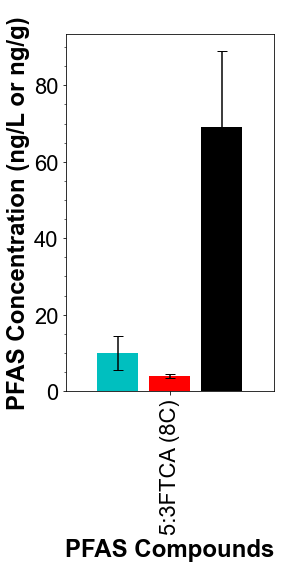

In [264]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Biosolids': 'black',
    'Influent': '#00BFBF',
    'Effluent': 'red'
}
#paper size (20,10) or (4,8) for insert version
create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='PFAS Concentration (ng/L or ng/g)', figsize=(4,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20)

#### Export Pivot Tables

In [245]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Average Pivot': Avg_Pivot,
       'Std Dev Pivot' :std_Pivot,
       'Count Pivot' : count_Pivot,
       'Std Error Pivot' : error_Pivot}

#filename: The name of the Excel file to write to.PFAS concentration found at the WRRFs from Influent, Effluent, and Biosolids
filename= 'WRRFS_Inf_Eff_Bio_QuantEst.xlsx'
dfs_to_excel(dfs, filename)

File 'WRRFS_Inf_Eff_Bio_QuantEst.xlsx' has been written with 4 tabs.


### Effluent By Sample Location (WRRFs)

#### Functions

In [10]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, start_date=None, 
                                      end_date=None,aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [11]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [12]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.15  # Width of each bar within a group
        gap = 0.05  # Gap between each group
        #This gap is only for Biosolids version
        #gap=.05+.15+.05+.15+.05

        # Store the first and last bar positions
        first_bar_position = None
        last_bar_position = None

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            if first_bar_position is None:
                first_bar_position = min(x)
            last_bar_position = max(x)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center')

        # Adjust x-axis limits to reduce extra space
        ax.set_xlim(first_bar_position - bar_width, last_bar_position + bar_width)

        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        # Set the legend outside the plot to the right
        #comment out for insert version
        #ax.legend( loc='upper center', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### Filters and Settings

In [67]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Effluent','Forest Grove Effluent','Hillsboro Effluent','Rock Creek Effluent','']
#filter_sample_location= ['Durham Influent','Forest Grove Influent','Hillsboro Influent','Rock Creek Influent']
filter_sample_location= ['Durham Biosolids','Rock Creek Biosolids']

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent']
#filter_type = ['Influent']
filter_type = ['Biosolids']

#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluoroheptanoic acid','6:2 Fluorotelomersulfonic acid','NEtFOSAA','Perfluorooctanoic acid (PFOA)','Perfluorooctanesulfonic acid (PFOS)',
                        'Perfluorononanoic acid','Perfluorodecanoic acid','5:3 FTCA']
#filter_pfas_compound=['5:3 FTCA']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

#### Create Pivot Table for Avg Concentrations

In [68]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, 
                                             start_date=start_date,end_date=end_date,filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)
Avg_Pivot=Avg_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','5:3FTCA','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
Avg_Pivot.loc['5:3FTCA']=0
Avg_Pivot=Avg_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  '5:3FTCA': '5:3FTCA (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})
Avg_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFBA (4C),0.000000,0.000000
PFBS (4C),0.000000,0.070769
PFPeA (5C),0.000000,0.043077
PFHxA (6C),0.790909,0.964615
PFHxS (6C),0.469091,0.082308
PFHpA (7C),0.016364,0.035385
6:2FTS (8C),0.000000,0.000000
5:3FTCA (8C),0.000000,0.000000
NEtFOSAA (8C),5.400000,4.825000


#### Create Pivot Table for Standard Deviation

In [69]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, 
                                              filter_pfas_compound=filter_pfas_compound, start_date=start_date,end_date=end_date,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)
# Add a new row for 5:3FTCA with NaN values
std_Pivot.loc['5:3FTCA'] = np.nan
#std_Pivot.loc['5:3FTCA']=0
std_Pivot=std_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','5:3FTCA','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
std_Pivot=std_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  '5:3FTCA': '5:3FTCA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})

std_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFBA (4C),0.000000,0.000000
PFBS (4C),0.000000,0.189361
PFPeA (5C),0.000000,0.155316
PFHxA (6C),0.566894,0.644898
PFHxS (6C),0.880414,0.206323
PFHpA (7C),0.054272,0.088752
6:2FTS (8C),0.000000,0.000000
5:3FTCA (8C),NaN,NaN
NEtFOSAA (8C),1.470374,1.194019


#### Create Pivot Table for Count of Samples

In [70]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, 
                                                filter_pfas_compound=filter_pfas_compound,start_date=start_date,end_date=end_date,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)
count_Pivot.loc['5:3FTCA']=0

count_Pivot=count_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','5:3FTCA','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
count_Pivot=count_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  '5:3FTCA': '5:3FTCA (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})

count_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFBA (4C),11,13
PFBS (4C),11,13
PFPeA (5C),11,13
PFHxA (6C),11,13
PFHxS (6C),11,13
PFHpA (7C),11,13
6:2FTS (8C),11,13
5:3FTCA (8C),0,0
NEtFOSAA (8C),11,12


#### Create Pivot Table for Sampling Error

In [71]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFBA (4C),0.000000,0.000000
PFBS (4C),0.000000,0.052519
PFPeA (5C),0.000000,0.043077
PFHxA (6C),0.170925,0.178863
PFHxS (6C),0.265455,0.057224
PFHpA (7C),0.016364,0.024615
6:2FTS (8C),0.000000,0.000000
5:3FTCA (8C),NaN,NaN
NEtFOSAA (8C),0.443334,0.344684


#### Export Tables

In [24]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Average Pivot': Avg_Pivot,
       'Std Dev Pivot' :std_Pivot,
       'Count Pivot' : count_Pivot,
       'Std Error Pivot' : error_Pivot}

#filename: The name of the Excel file to write to.PFAS concentration found at the WRRFs from Influent, Effluent, and Biosolids
filename= 'WRRFS_Biosolids.xlsx'
dfs_to_excel(dfs, filename)

File 'WRRFS_Biosolids.xlsx' has been written with 4 tabs.


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


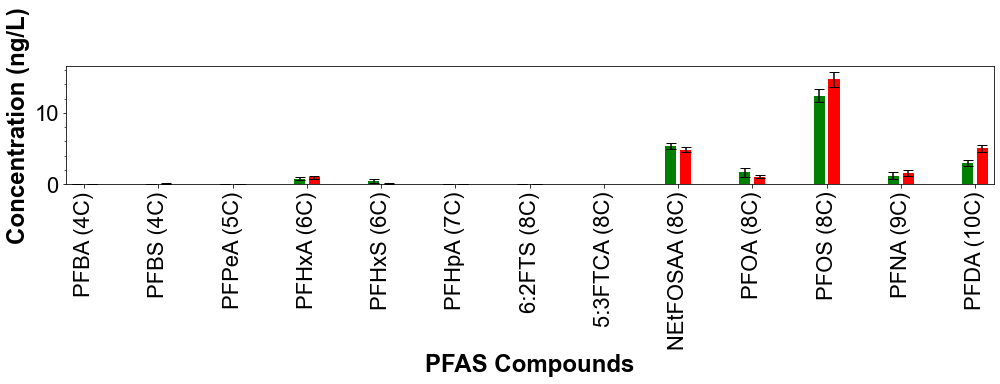

In [72]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Durham Effluent': '#008000',
    'Forest Grove Effluent': '#00BFBF',
    'Rock Creek Effluent': '#FF0000',
    'Hillsboro Effluent' : '#BF00BF',
    'Durham Influent': '#008000',
    'Forest Grove Influent': '#00BFBF',
    'Rock Creek Influent': '#FF0000',
    'Hillsboro Influent' : '#BF00BF',
    'Durham Biosolids': '#008000',
    'Rock Creek Biosolids': '#FF0000'
}
#Main figure is (10,8), insert is (3,5)
create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='Concentration (ng/L)', figsize=(14,5),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)

### Biosolids by Plant

#### Functions

In [11]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [12]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [13]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group
        gap = 0.05  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        # convert y-axis to Logarithmic scale
        plt.yscale("log") #comment out for first plot. This is only for the Biosolids plot
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=0, ha='center')
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        ax.legend( loc='lower center', bbox_to_anchor=(0.5, -0.7),fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### Filters and Settings

In [14]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Biosolids','Rock Creek Biosolids']
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)']

#### Create Pivot Table for Avg Concentrations

In [15]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)

Avg_Pivot=Avg_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
Avg_Pivot

NameError: name 'df_PFAS_Attributes' is not defined

#### Create Pivot Table for Standard Deviation

In [ ]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot=std_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})

std_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),3.096244,4.719029
PFOA (8C),2.040175,0.579663


#### Create Pivot Table for Count of Samples

In [ ]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot=count_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
count_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),11,14
PFOA (8C),11,14


#### Create Pivot Table for Sampling Error

In [ ]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),0.933553,1.261213
PFOA (8C),0.615136,0.154922


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

In [ ]:
## Add Nationwide data
Avg_Pivot['Nationwide Average']=[233,24]  
Avg_Pivot['Nationwide Average of No Industries']=[167,15]  

error_Pivot['Nationwide Average']=[107,7]  
error_Pivot['Nationwide Average of No Industries']=[92,4.3] 

In [ ]:
Avg_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids,Nationwide Average,Nationwide Average of No Industries
PFAS Compound,,,,
PFOS (8C),12.445455,15.500000,233,167
PFOA (8C),1.970455,1.374643,24,15


In [ ]:
error_pivot_table

Sample Location,Durham Biosolids,Rock Creek Biosolids,Nationwide Average,Nationwide Average of No Industries
PFAS Compound,,,,
PFOS (8C),0.933553,1.261213,107,92.0
PFOA (8C),0.615136,0.154922,7,4.3


<ipython-input-226-991b3b627e3e>:49: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
C:\Users\rodriguezc\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


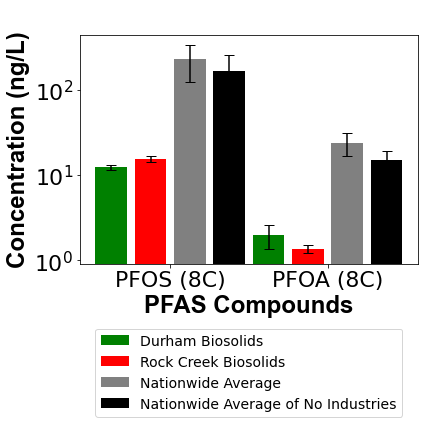

In [ ]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Durham Biosolids': '#008000',
    'Rock Creek Biosolids': '#FF0000',
    'Nationwide Average': 'grey',
    'Nationwide Average of No Industries': 'black'
}

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='Concentration (ng/L)', figsize=(6,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)

### PFAS Concentration by Wet Industry (Section 14)

#### Functions

In [32]:
def create_custom_pivot(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None,start_date=None,end_date=None, aggfunc='mean'):
    """
    Create a custom pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sector', and 'PFAS Compound', averaging 'Quant Incl Estimates Incl Qual Flags'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Type'
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        # Apply filters based on 'Qual Summary (Grade for filtering)'
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'Sector'
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'PFAS Compound' as rows, 'Sector' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sector',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [33]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [34]:
def create_bar_chart(average_pivot, std_error_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        std_errors = std_error_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, yerr=std_errors[valid], bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label, max_length=16):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        
        return '\n'.join(split_labels)

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=7, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()


#### Filters and Settings

In [35]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','Probably okay','Probably ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Chemicals','Electrical and Electronic Components','Industrial Launderers','Metal Finishing','Paper Products','Rubber Manufacture']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['5:3 FTCA','6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid',
                       'Perfluorodecanoic acid','Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                       'Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                       'Perfluoropentanoic acid']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-31'

#### 14.3) Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [56]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector,start_date=start_date,end_date=end_date, filter_pfas_compound=filter_pfas_compound,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

average_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,0.000000,0.000000,0.000000,0.000,970.000000
PFBA,0.00,101.930000,0.540000,919.419355,0.000,82.016667
PFPeA,2.20,51.524839,0.360000,794.562500,23.400,99.314286
PFHxA,2.27,36.475172,2.483333,588.475000,34.720,633.000000
PFHpA,0.95,20.761613,0.531667,295.342188,10.880,119.362857
PFOA,2.00,15.735161,3.666667,242.538788,3.140,218.285714
PFNA,0.00,8.033226,1.333333,109.196061,0.112,27.666667
PFDA,0.00,4.998387,0.533333,67.078125,0.000,50.285714
PFDoA,0.00,1.106129,1.298333,10.955161,0.000,6.333333


#### 14.3) Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [37]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,
                                  start_date=start_date,end_date=end_date, aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

std_dev_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,0.000000,NaN,NaN,NaN,NaN
PFBA,0.000000,166.339162,1.207477,4671.361307,0.000000,63.156961
PFPeA,3.111270,82.313381,0.804984,4063.156847,25.880495,63.553322
PFHxA,2.022325,55.270711,2.540407,2643.100860,64.630465,433.412429
PFHpA,1.343503,33.327093,1.003004,1428.298412,9.713753,77.236487
PFOA,1.131371,21.861571,3.265374,810.483187,2.885827,176.693439
PFNA,0.000000,12.824998,1.158735,436.058982,0.250440,18.348479
PFDA,0.000000,8.069701,0.828654,235.075379,0.000000,27.620731
PFDoA,0.000000,1.805426,2.127632,38.370851,0.000000,3.253716


#### 14.4) Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [38]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,
                                start_date=start_date,end_date=end_date,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)

# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

count_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,5,1,1,1,1
PFBA,2.0,30,5,31,4,6
PFPeA,2.0,31,5,32,5,7
PFHxA,2.0,29,6,32,5,7
PFHpA,2.0,31,6,32,5,7
PFOA,2.0,31,6,33,5,7
PFNA,2.0,31,6,33,5,6
PFDA,2.0,31,6,32,6,7
PFDoA,2.0,31,6,31,5,6


#### 14.4) Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [39]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,0.000000,NaN,NaN,NaN,NaN
PFBA,0.00,30.369237,0.540000,839.001258,0.000000,25.783721
PFPeA,2.20,14.783920,0.360000,718.271440,11.574109,24.020898
PFHxA,1.43,10.263513,1.037117,467.238635,28.903623,163.814500
PFHpA,0.95,5.985723,0.409475,252.489873,4.344122,29.192648
PFOA,0.80,3.926454,1.333083,141.087013,1.290581,66.783843
PFNA,0.00,2.303438,0.473052,75.908125,0.112000,7.490735
PFDA,0.00,1.449361,0.338296,41.555849,0.000000,10.439655
PFDoA,0.00,0.324264,0.868602,6.891608,0.000000,1.328324


#### 14.5) Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

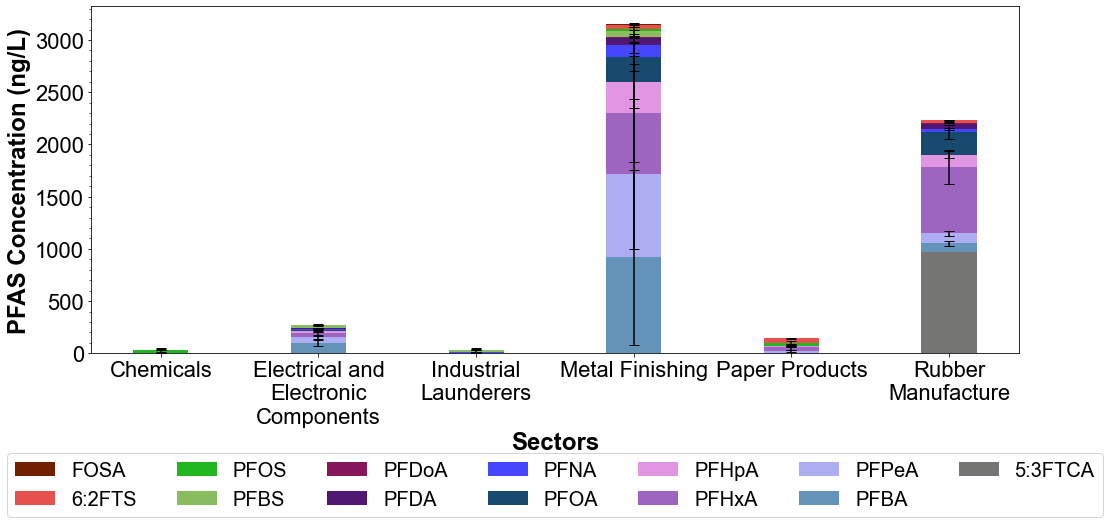

In [40]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)



<ipython-input-34-aaf4f9e6a1be>:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


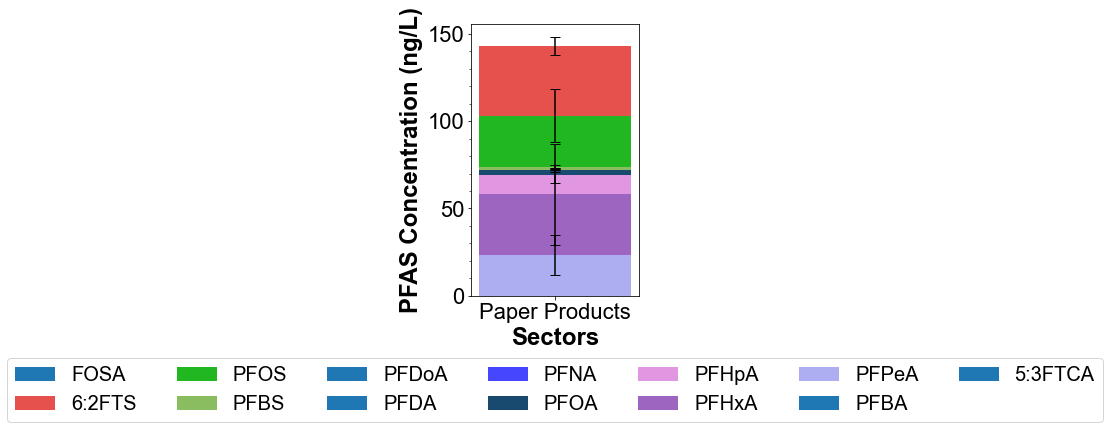

In [41]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(3, 5)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Paper Products']], std_error_pivot[['Paper Products']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

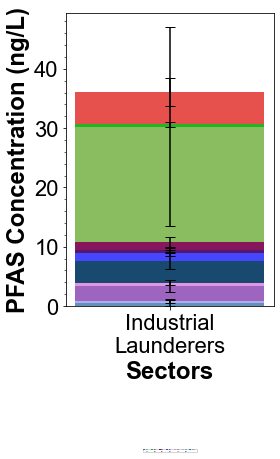

In [42]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(4, 7)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Industrial Launderers']], std_error_pivot[['Industrial Launderers']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=0, compound_colors_dict=compound_colors_dict_abbrev)

<ipython-input-34-aaf4f9e6a1be>:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


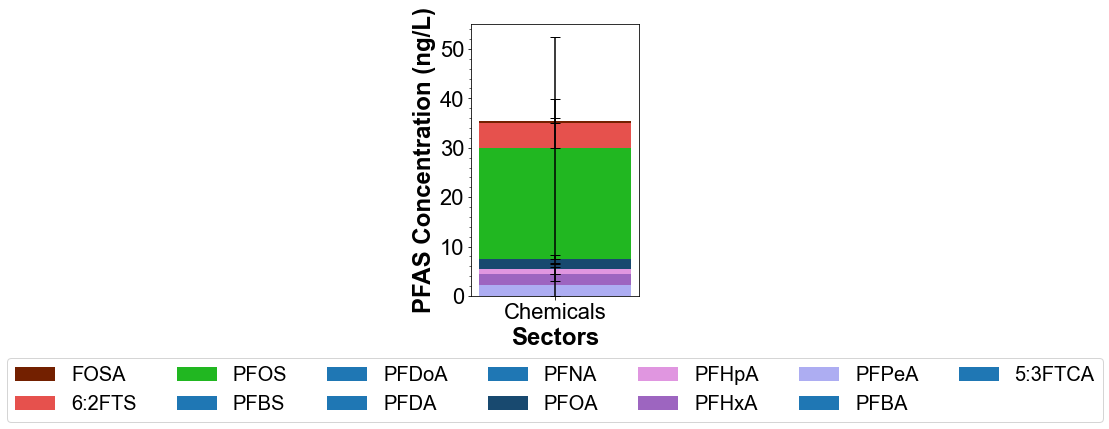

In [43]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(3, 5)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Chemicals']], std_error_pivot[['Chemicals']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

### Convert to Percentage of Total PFAS Concentration (Requires PFAS Concentration for Wet Industry)

#### Modify Function

In [81]:
def create_bar_chart(average_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label, max_length=16):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        
        return '\n'.join(split_labels)

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.7),ncol=7, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()


#### Convert to Percentage

In [57]:
# Assuming df is your DataFrame
average_pivot.loc['Total PFAS'] = average_pivot.sum()
average_pivot['Electronics_Percentage'] = (average_pivot['Electrical and Electronic Components'] / average_pivot.loc['Total PFAS', 'Electrical and Electronic Components']) * 100
average_pivot['Chemical_Percentage'] = (average_pivot['Chemicals'] / average_pivot.loc['Total PFAS', 'Chemicals']) * 100

percentage_pivot=average_pivot[['Electronics_Percentage','Chemical_Percentage']]
percentage_pivot=percentage_pivot.iloc[:-1]

In [77]:
percentage_pivot=percentage_pivot.rename(columns={
    'Electronics_Percentage': 'Electrical and Electronic Components',
    'Chemical_Percentage': 'Chemicals'
})

#### Create Stacked Bar for Each Sector

<ipython-input-54-77fc60a6fa5c>:66: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


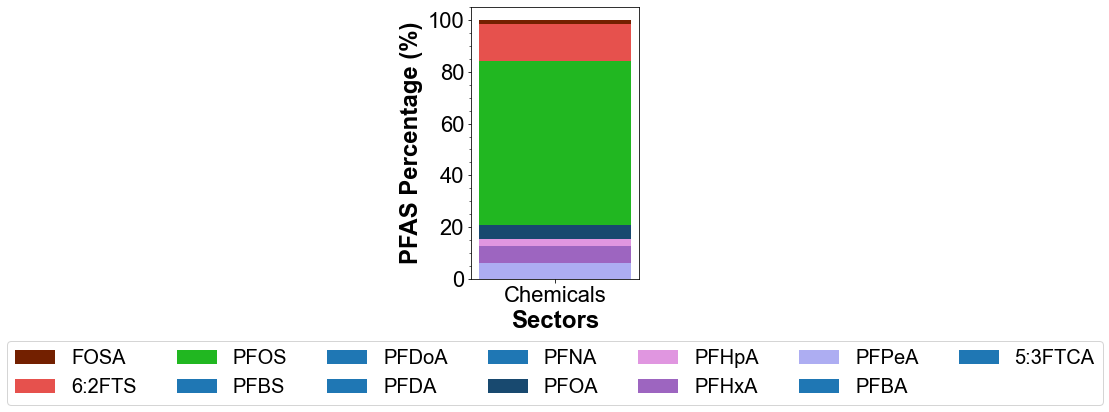

In [73]:
create_bar_chart(average_pivot=percentage_pivot[['Chemicals']], figsize=figsize, title=title, xlabel=xlabel, ylabel='PFAS Percentage (%)', title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

<ipython-input-81-802dda9c7c0e>:66: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


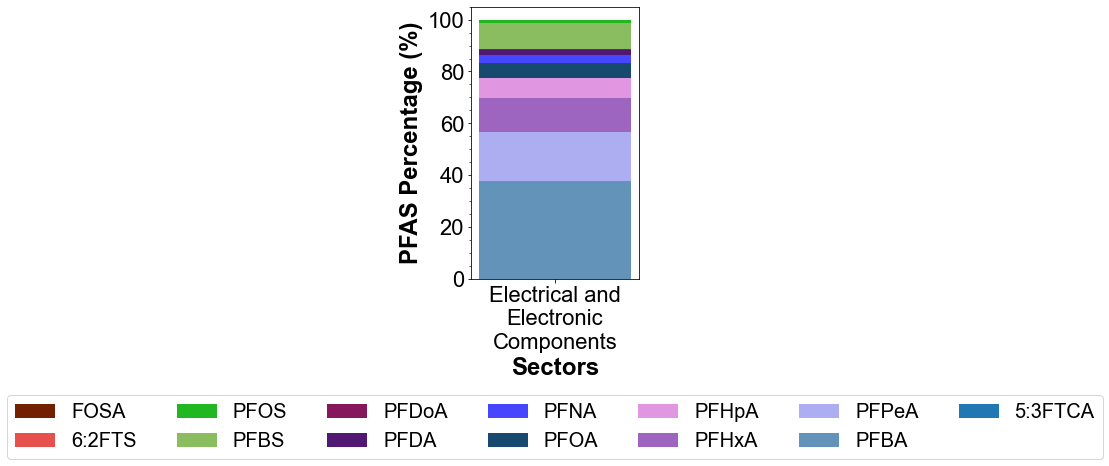

In [82]:
create_bar_chart(average_pivot=percentage_pivot[['Electrical and Electronic Components']], figsize=figsize, title=title, xlabel=xlabel, ylabel='PFAS Percentage (%)', title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

### PFAS Concentration in the Electronic Sector

#### Functions

In [155]:
def create_custom_pivot(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None,filter_location=None,start_date=None, end_date=None, aggfunc='mean'):
    """
    Create a custom pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sector', and 'PFAS Compound', averaging 'Quant Incl Estimates Incl Qual Flags'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Type'
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        # Apply filters based on 'Qual Summary (Grade for filtering)'
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'Sector'
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]

        # Apply filters based on 'Sector'
        if filter_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_location)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'PFAS Compound' as rows, 'Sector' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [156]:
def create_bar_chart(average_pivot, std_error_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')

    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        std_errors = std_error_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, yerr=std_errors[valid], bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label):
        if len(label) > 10:
            split_point = label.find(' ', 10)  # Find next space after 16th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=6, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()

#### Filters and Settings

In [157]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','Probably okay','Probably ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Electrical and Electronic Components']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluorododecanoic acid',
                       'Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                       'Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
filter_location= ['Intel Aloha F15','Intel Ronler PAWN','Intel Ronler WATR','Jireh Semiconductor Inc','Maxim (Analog)','OSRAM Opto Inc']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

#### Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [158]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,
                                  start_date=start_date, end_date=end_date,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

# Dictionary mapping old column names to new names
rename_dict = {
    'Intel Aloha F15': 'Electronic Components A',
    'Intel Ronler PAWN': 'Electronic Components B',
    'Intel Ronler WATR': 'Electronic Components C',
    'Jireh Semiconductor Inc' : 'Electronic Components D',
    'Maxim (Analog)': 'Electronic Components E',
    'OSRAM Opto Inc': 'Electronic Components F'
}

# Rename the columns
average_pivot.rename(columns=rename_dict, inplace=True)

average_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,0.575,3.383333,28.883333,365.714286,50.333333,0.0
PFPeA,0.406,0.323333,16.216667,194.285714,22.666667,0.0
PFHxA,0.800,1.476000,12.480000,125.714286,17.333333,0.0
PFHpA,0.118,0.135000,4.201667,78.000000,11.833333,0.0
PFOA,0.196,0.053333,2.748333,52.714286,16.833333,0.0
PFNA,0.048,0.048333,1.416667,29.714286,5.333333,0.0
PFDA,0.000,0.058333,0.633333,18.428571,3.633333,0.0
PFDoA,0.000,0.000000,0.183333,3.728571,1.181667,0.0
PFBS,0.664,0.650000,40.156000,55.128571,41.116667,0.0


#### Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [159]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,
                                  start_date=start_date, end_date=end_date,aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

# Rename the columns
std_dev_pivot.rename(columns=rename_dict, inplace=True)

std_dev_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E
PFAS Compound,,,,,
PFBA,1.150000,3.941277,69.145366,148.307916,18.007406
PFPeA,0.653207,0.360703,38.116055,39.096949,6.860515
PFHxA,1.262161,2.298071,27.130278,35.873455,6.345602
PFHpA,0.263856,0.330681,9.703691,20.623611,5.006662
PFOA,0.438269,0.130639,6.494922,9.268482,4.215052
PFNA,0.107331,0.118392,3.470110,7.994045,5.057140
PFDA,0.000000,0.142887,1.551344,5.380742,4.082483
PFDoA,0.000000,0.000000,0.449073,1.931074,1.134732
PFBS,1.313195,1.053300,83.773663,49.521871,69.897937


####  Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [160]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,
                                start_date=start_date, end_date=end_date,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)

# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

# Rename the columns
count_pivot.rename(columns=rename_dict, inplace=True)

count_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,4,6,6,7,6,1
PFPeA,5,6,6,7,6,1
PFHxA,5,5,5,7,6,1
PFHpA,5,6,6,7,6,1
PFOA,5,6,6,7,6,1
PFNA,5,6,6,7,6,1
PFDA,5,6,6,7,6,1
PFDoA,5,6,6,7,6,1
PFBS,5,6,5,7,6,1


#### Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [161]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,0.575000,1.609020,28.228478,56.055124,7.351493,NaN
PFPeA,0.292123,0.147256,15.560814,14.777258,2.800794,NaN
PFHxA,0.564455,1.027729,12.133029,13.558891,2.590581,NaN
PFHpA,0.118000,0.135000,3.961515,7.794992,2.043961,NaN
PFOA,0.196000,0.053333,2.651541,3.503157,1.720788,NaN
PFNA,0.048000,0.048333,1.416667,3.021465,2.064569,NaN
PFDA,0.000000,0.058333,0.633333,2.033729,1.666667,NaN
PFDoA,0.000000,0.000000,0.183333,0.729877,0.463252,NaN
PFBS,0.587278,0.430008,37.464721,18.717508,28.535713,NaN


#### Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


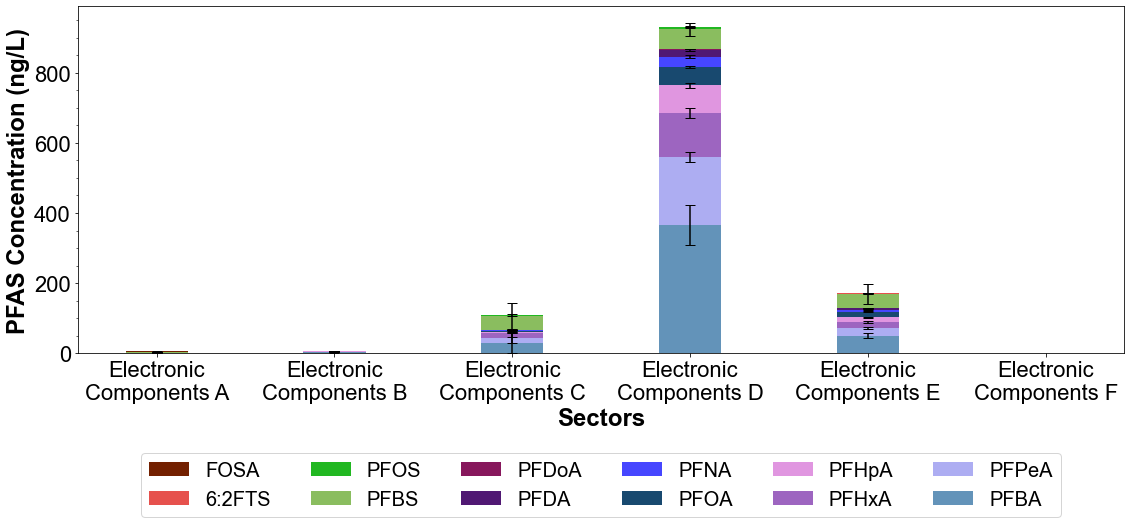

In [162]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


#### Convert PFAS Concentrations to Percent of PFAS Total

In [163]:
# Assuming df is your DataFrame
average_pivot.loc['Total PFAS'] = average_pivot.sum()
average_pivot['Electronic Components A_Percentage'] = (average_pivot['Electronic Components A'] / average_pivot.loc['Total PFAS', 'Electronic Components A']) * 100
average_pivot['Electronic Components B_Percentage'] = (average_pivot['Electronic Components B'] / average_pivot.loc['Total PFAS', 'Electronic Components B']) * 100
average_pivot['Electronic Components C_Percentage'] = (average_pivot['Electronic Components C'] / average_pivot.loc['Total PFAS', 'Electronic Components C']) * 100
average_pivot['Electronic Components D_Percentage'] = (average_pivot['Electronic Components D'] / average_pivot.loc['Total PFAS', 'Electronic Components D']) * 100
average_pivot['Electronic Components E_Percentage'] = (average_pivot['Electronic Components E'] / average_pivot.loc['Total PFAS', 'Electronic Components E']) * 100
average_pivot['Electronic Components F_Percentage'] = (average_pivot['Electronic Components F'] / average_pivot.loc['Total PFAS', 'Electronic Components F']) * 100

percentage_pivot=average_pivot[['Electronic Components A_Percentage','Electronic Components B_Percentage','Electronic Components C_Percentage',
                                'Electronic Components D_Percentage','Electronic Components E_Percentage','Electronic Components F_Percentage']]

# Dictionary mapping old column names to new names
rename_dict = {
    'Electronic Components A_Percentage': 'Electronic Components A',
    'Electronic Components B_Percentage': 'Electronic Components B',
    'Electronic Components C_Percentage': 'Electronic Components C',
    'Electronic Components D_Percentage' : 'Electronic Components D',
    'Electronic Components E_Percentage': 'Electronic Components E',
    'Electronic Components F_Percentage': 'Electronic Components F'
}

# Rename the columns
percentage_pivot.rename(columns=rename_dict, inplace=True)

percentage_pivot=percentage_pivot.iloc[:-1]
percentage_pivot

<ipython-input-163-aa53b2c8dce6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentage_pivot.rename(columns=rename_dict, inplace=True)


Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,10.075346,48.211656,26.396919,39.265962,29.486947,0.0
PFPeA,7.114070,4.607419,14.820659,20.860042,13.278890,0.0
PFHxA,14.017873,21.032632,11.405663,13.497674,10.154445,0.0
PFHpA,2.067636,1.923716,3.839967,8.374693,6.932362,0.0
PFOA,3.434379,0.759987,2.511744,5.659820,9.861529,0.0
PFNA,0.841072,0.688738,1.294713,3.190359,3.124445,0.0
PFDA,0.000000,0.831235,0.578813,1.978636,2.128528,0.0
PFDoA,0.000000,0.000000,0.167551,0.400329,0.692260,0.0
PFBS,11.634834,9.262338,36.699182,5.919037,24.087516,0.0


#### Modify Function for Percentage Plot

In [164]:
def create_bar_chart(average_pivot,  compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')

    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label):
        if len(label) > 10:
            split_point = label.find(' ', 10)  # Find next space after 16th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'PFAS Percentage (%)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=6, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()

#### Create Stacked Bar

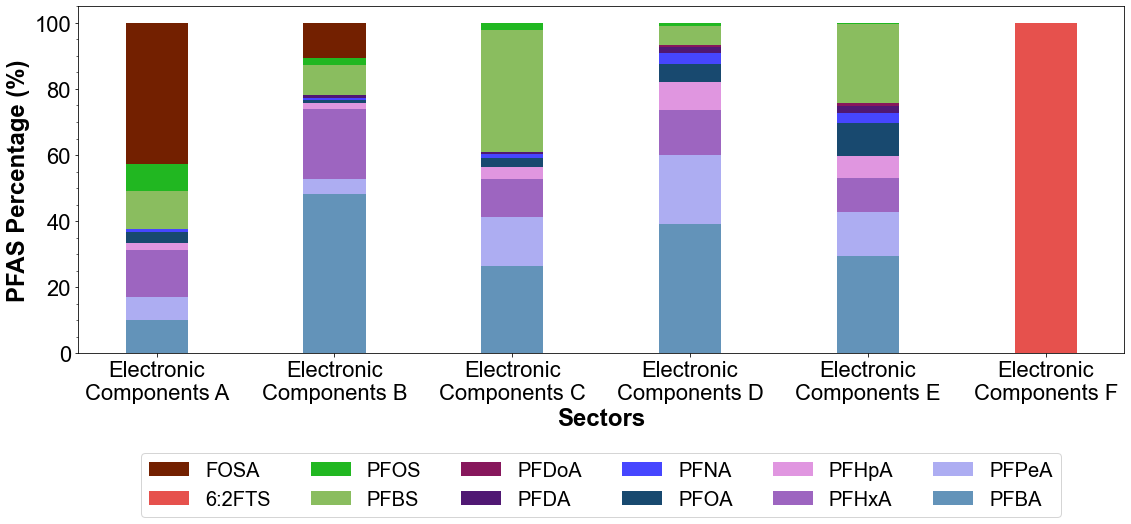

In [166]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='Percentage of Total PFAS Concentration (%)'
ylabel='PFAS Percentage (%)'

create_bar_chart(average_pivot=percentage_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


### PFAS Concentrations in the Metal Finishers Sector

#### Functions

In [169]:
def create_bar_chart(average_pivot, std_error_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    #change to .35 for many columns or .2 for one column
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        std_errors = std_error_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, yerr=std_errors[valid], bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]


    def split_label(label, max_length=6):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        
        return '\n'.join(split_labels)
    ax.set_ylim(0, 400)  # Set y-axis from 0 to 400 #remove for one bar chart graphs
    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)
    
    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=6, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()

#### Filters and Settings

In [170]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','Probably okay','Probably ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Metal Finishing']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluorododecanoic acid',
                       'Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                       'Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
filter_location= ['Anodize Solutions','Davis Tool','FormFactor','JAE Oregon Inc','Lam Research Corp','Leupold & Stevens Inc','Lotus Applied Tech','Pioneer Metal Finishing',
                  'Quantum Global','Sheldon Manufacturing Inc','Tektronix Bldg 50','TTM','Westak']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2019-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

#### Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [171]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,
                                  start_date=start_date, end_date=end_date,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

# Dictionary mapping old column names to new names
rename_dict = {
      'Anodize Solutions':'Metal Finisher B', 
      'Davis Tool':'Metal Finisher C', 
      'FormFactor':'Metal Finisher D',
      'JAE Oregon Inc':'Metal Finisher E',
       'Lam Research Corp':'Metal Finisher F', 
       'Leupold & Stevens Inc':'Metal Finisher G', 
       'Lotus Applied Tech': 'Metal Finisher H',
       'Pioneer Metal Finishing': 'Metal Finisher I', 
       'Quantum Global': 'Metal Finisher J',
       'Sheldon Manufacturing Inc': 'Metal Finisher K', 
       'TTM': 'Metal Finisher M', 
       'Tektronix Bldg 50':'Metal Finisher L', 
       'Westak':'Metal Finisher N'
}

# Rename the columns
average_pivot.rename(columns=rename_dict, inplace=True)

average_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,0,0,0,28.620000,0,3.250,4.3,1.30,4708.333333,0.0,10.05,17.225000,0.00
PFPeA,0,0,0,104.733333,0,0.575,1.3,3.45,4121.000000,0.0,12.50,9.025000,0.00
PFHxA,0,0,0,486.333333,0,26.900,NaN,1.20,2612.633333,0.0,12.50,18.875000,0.00
PFHpA,0,0,0,132.033333,0,0.775,1.2,0.00,1434.825000,0.0,3.00,9.875000,0.00
PFOA,0,0,0,547.666667,0,5.880,7.4,0.44,763.966667,0.0,3.25,22.450000,0.00
PFNA,0,0,0,186.500000,0,3.620,1.4,0.00,409.495000,0.0,0.65,1.675000,0.00
PFDA,0,0,0,293.833333,0,0.000,1.2,0.00,62.616667,0.0,0.00,1.650000,0.00
PFDoA,0,0,0,52.350000,0,0.000,1.4,0.00,4.602000,0.0,0.00,0.275000,0.00
PFBS,0,0,0,0.684000,0,4.500,0.0,6.00,284.560000,NaN,3.70,7.613333,NaN


#### Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [172]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

# Rename the columns
std_dev_pivot.rename(columns=rename_dict, inplace=True)

std_dev_pivot

Sample Location,Metal Finisher B,Metal Finisher E,Metal Finisher G,Metal Finisher I,Metal Finisher J,Metal Finisher M,Metal Finisher L
PFAS Compound,,,,,,,
PFBA,0.00000,31.462464,6.500000,1.838478,9617.675167,1.343503,28.606570
PFPeA,0.00000,81.200481,2.175546,4.879037,8525.903778,0.707107,5.499318
PFHxA,0.00000,394.656753,21.037720,1.697056,5776.911865,17.677670,16.645195
PFHpA,0.00000,114.301298,1.550000,0.000000,3106.598653,2.404163,9.496447
PFOA,0.00000,568.832053,5.040932,0.622254,1800.018639,4.596194,15.786387
PFNA,0.00000,296.595363,3.774873,0.000000,1241.862385,0.919239,2.150000
PFDA,0.00000,459.467342,0.983870,0.000000,410.151356,0.000000,1.989137
PFDoA,0.00000,72.194654,0.000000,0.000000,35.233577,0.000000,0.550000
PFBS,0.00000,0.723270,9.000000,8.485281,433.442659,5.232590,12.466296


####  Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [173]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)

# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

# Rename the columns
count_pivot.rename(columns=rename_dict, inplace=True)

count_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,2,1,1,6,1,4,1.0,2,7,1.0,2,4,1.0
PFPeA,2,1,1,7,1,5,1.0,2,7,1.0,2,4,1.0
PFHxA,2,1,1,7,1,6,NaN,2,7,1.0,2,4,1.0
PFHpA,2,1,1,7,1,4,1.0,2,7,1.0,2,4,1.0
PFOA,2,1,1,7,1,6,1.0,2,7,1.0,2,4,1.0
PFNA,2,1,1,7,1,6,1.0,2,7,1.0,2,4,1.0
PFDA,2,1,1,7,1,5,1.0,2,7,1.0,2,4,1.0
PFDoA,2,1,1,7,1,4,1.0,2,6,1.0,2,4,1.0
PFBS,2,1,1,6,1,4,1.0,2,6,NaN,2,3,NaN


#### Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [174]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher L,Metal Finisher M,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,0.0,NaN,NaN,12.844497,NaN,3.250000,NaN,1.30,3635.139526,NaN,14.303285,0.95,NaN
PFPeA,0.0,NaN,NaN,30.690897,NaN,0.972934,NaN,3.45,3222.488729,NaN,2.749659,0.50,NaN
PFHxA,0.0,NaN,NaN,149.166232,NaN,8.588613,NaN,1.20,2183.467449,NaN,8.322597,12.50,NaN
PFHpA,0.0,NaN,NaN,43.201830,NaN,0.775000,NaN,0.00,1174.183923,NaN,4.748223,1.70,NaN
PFOA,0.0,NaN,NaN,214.998307,NaN,2.057952,NaN,0.44,680.343096,NaN,7.893193,3.25,NaN
PFNA,0.0,NaN,NaN,112.102510,NaN,1.541085,NaN,0.00,469.379862,NaN,1.075000,0.65,NaN
PFDA,0.0,NaN,NaN,173.662332,NaN,0.440000,NaN,0.00,155.022641,NaN,0.994569,0.00,NaN
PFDoA,0.0,NaN,NaN,27.287014,NaN,0.000000,NaN,0.00,14.384048,NaN,0.275000,0.00,NaN
PFBS,0.0,NaN,NaN,0.295274,NaN,4.500000,NaN,6.00,176.952225,NaN,7.197419,3.70,NaN


#### Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

In [175]:
average_pivot[['Metal Finisher B', 'Metal Finisher C', 'Metal Finisher D',
              'Metal Finisher F', 'Metal Finisher G','Metal Finisher H', 'Metal Finisher I',
              'Metal Finisher K', 'Metal Finisher M', 'Metal Finisher L','Metal Finisher N']]

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,
PFBA,0,0,0,0,3.250,4.3,1.30,0.0,10.05,17.225000,0.00
PFPeA,0,0,0,0,0.575,1.3,3.45,0.0,12.50,9.025000,0.00
PFHxA,0,0,0,0,26.900,NaN,1.20,0.0,12.50,18.875000,0.00
PFHpA,0,0,0,0,0.775,1.2,0.00,0.0,3.00,9.875000,0.00
PFOA,0,0,0,0,5.880,7.4,0.44,0.0,3.25,22.450000,0.00
PFNA,0,0,0,0,3.620,1.4,0.00,0.0,0.65,1.675000,0.00
PFDA,0,0,0,0,0.000,1.2,0.00,0.0,0.00,1.650000,0.00
PFDoA,0,0,0,0,0.000,1.4,0.00,0.0,0.00,0.275000,0.00
PFBS,0,0,0,0,4.500,0.0,6.00,NaN,3.70,7.613333,NaN


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

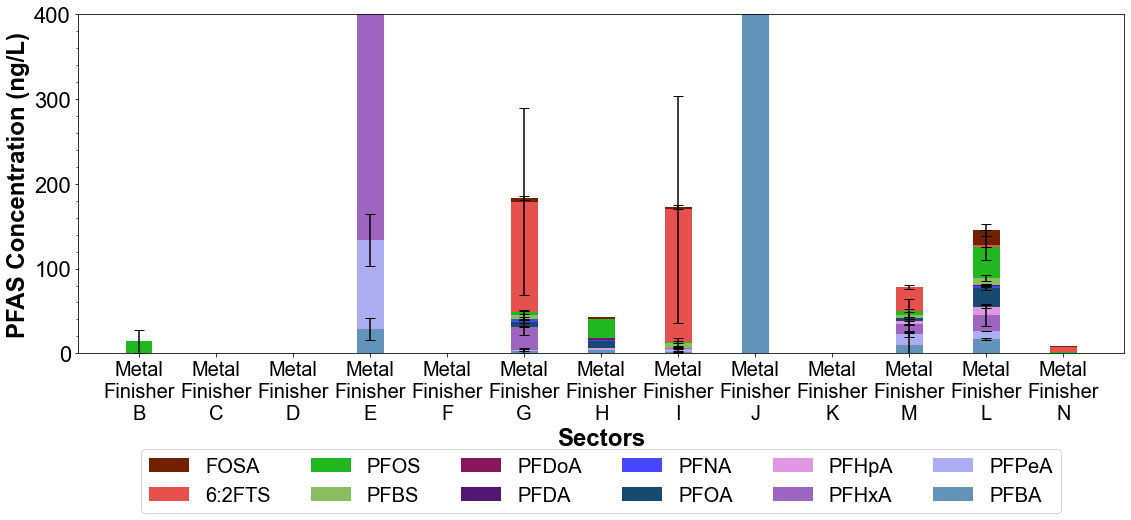

In [176]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=20, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

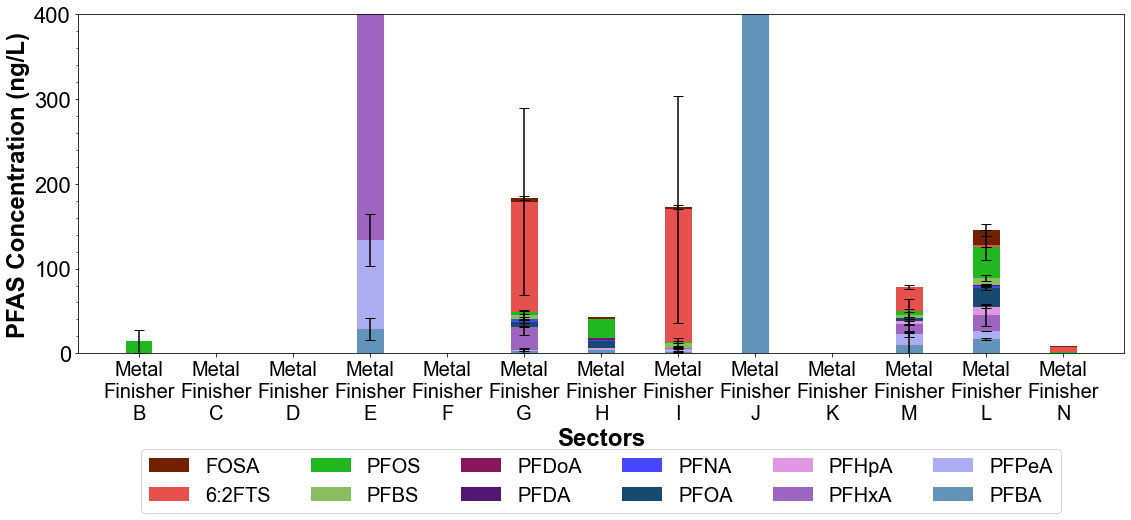

In [177]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=20, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


<ipython-input-169-72ee28152f53>:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


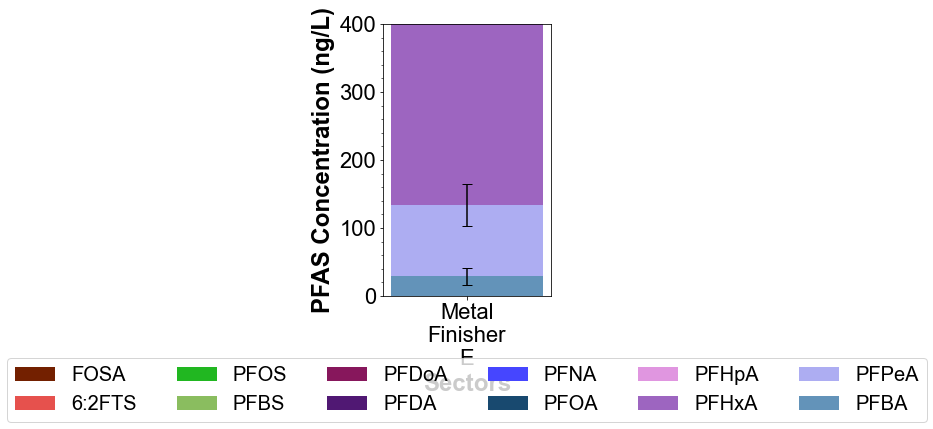

In [178]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(3, 5)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Metal Finisher E']], std_error_pivot[['Metal Finisher E']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

<ipython-input-169-72ee28152f53>:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


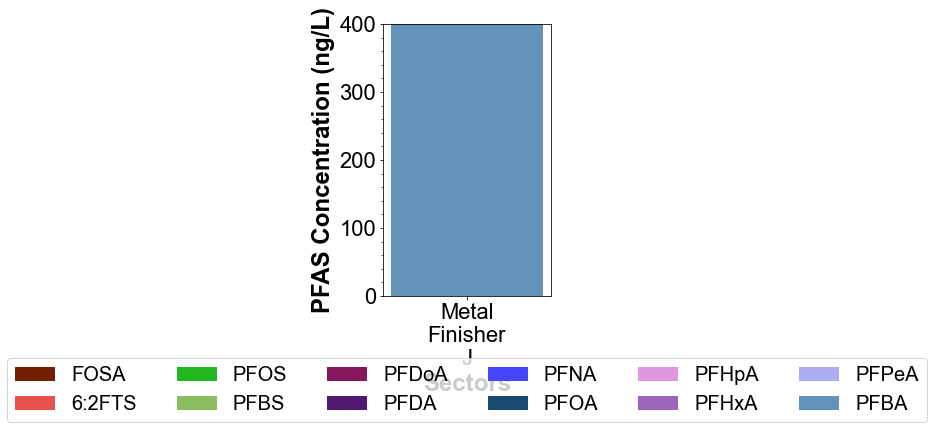

In [179]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(3, 5)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Metal Finisher J']], std_error_pivot[['Metal Finisher J']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

### Convert to 100% (Requires running previous section)

#### Convert to PFAS Percentage

In [180]:
# Assuming df is your DataFrame
average_pivot.loc['Total PFAS'] = average_pivot.sum()
average_pivot['Metal Finisher B_Percentage'] = (average_pivot['Metal Finisher B'] / average_pivot.loc['Total PFAS', 'Metal Finisher B']) * 100
average_pivot['Metal Finisher C_Percentage'] = (average_pivot['Metal Finisher C'] / average_pivot.loc['Total PFAS', 'Metal Finisher C']) * 100
average_pivot['Metal Finisher D_Percentage'] = (average_pivot['Metal Finisher D'] / average_pivot.loc['Total PFAS', 'Metal Finisher D']) * 100
average_pivot['Metal Finisher E_Percentage'] = (average_pivot['Metal Finisher E'] / average_pivot.loc['Total PFAS', 'Metal Finisher E']) * 100
average_pivot['Metal Finisher F_Percentage'] = (average_pivot['Metal Finisher F'] / average_pivot.loc['Total PFAS', 'Metal Finisher F']) * 100
average_pivot['Metal Finisher G_Percentage'] = (average_pivot['Metal Finisher G'] / average_pivot.loc['Total PFAS', 'Metal Finisher G']) * 100
average_pivot['Metal Finisher H_Percentage'] = (average_pivot['Metal Finisher H'] / average_pivot.loc['Total PFAS', 'Metal Finisher H']) * 100
average_pivot['Metal Finisher I_Percentage'] = (average_pivot['Metal Finisher I'] / average_pivot.loc['Total PFAS', 'Metal Finisher I']) * 100
average_pivot['Metal Finisher J_Percentage'] = (average_pivot['Metal Finisher J'] / average_pivot.loc['Total PFAS', 'Metal Finisher J']) * 100
average_pivot['Metal Finisher K_Percentage'] = (average_pivot['Metal Finisher K'] / average_pivot.loc['Total PFAS', 'Metal Finisher K']) * 100
average_pivot['Metal Finisher M_Percentage'] = (average_pivot['Metal Finisher M'] / average_pivot.loc['Total PFAS', 'Metal Finisher M']) * 100
average_pivot['Metal Finisher L_Percentage'] = (average_pivot['Metal Finisher L'] / average_pivot.loc['Total PFAS', 'Metal Finisher L']) * 100
average_pivot['Metal Finisher N_Percentage'] = (average_pivot['Metal Finisher N'] / average_pivot.loc['Total PFAS', 'Metal Finisher N']) * 100


percentage_pivot=average_pivot[['Metal Finisher B_Percentage','Metal Finisher C_Percentage','Metal Finisher D_Percentage','Metal Finisher E_Percentage',
                                'Metal Finisher F_Percentage','Metal Finisher G_Percentage','Metal Finisher H_Percentage','Metal Finisher I_Percentage',
                                'Metal Finisher J_Percentage','Metal Finisher K_Percentage','Metal Finisher M_Percentage','Metal Finisher L_Percentage',
                                'Metal Finisher N_Percentage']]

# Dictionary mapping old column names to new names
rename_dict = {
      'Metal Finisher B_Percentage':'Metal Finisher B', 
      'Metal Finisher C_Percentage':'Metal Finisher C', 
      'Metal Finisher D_Percentage':'Metal Finisher D',
      'Metal Finisher E_Percentage':'Metal Finisher E',
      'Metal Finisher F_Percentage':'Metal Finisher F', 
      'Metal Finisher G_Percentage':'Metal Finisher G', 
      'Metal Finisher H_Percentage': 'Metal Finisher H',
      'Metal Finisher I_Percentage': 'Metal Finisher I', 
      'Metal Finisher J_Percentage': 'Metal Finisher J',
      'Metal Finisher K_Percentage': 'Metal Finisher K', 
      'Metal Finisher M_Percentage': 'Metal Finisher M', 
      'Metal Finisher L_Percentage':'Metal Finisher L', 
      'Metal Finisher N_Percentage':'Metal Finisher N'
}

# Rename the columns
percentage_pivot.rename(columns=rename_dict, inplace=True)

percentage_pivot=percentage_pivot.iloc[:-1]
percentage_pivot

<ipython-input-180-a2ec855e5f0f>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentage_pivot.rename(columns=rename_dict, inplace=True)


Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,0.0,NaN,NaN,1.474934,NaN,1.775714,10.046729,0.754104,32.652402,NaN,12.802548,11.826567,0.000000
PFPeA,0.0,NaN,NaN,5.397440,NaN,0.314165,3.037383,2.001276,28.579231,NaN,15.923567,6.196503,0.000000
PFHxA,0.0,NaN,NaN,25.063225,NaN,14.697446,NaN,0.696096,18.118673,NaN,15.923567,12.959445,0.000000
PFHpA,0.0,NaN,NaN,6.804348,NaN,0.423439,2.803738,0.000000,9.950545,NaN,3.821656,6.780107,0.000000
PFOA,0.0,NaN,NaN,28.224043,NaN,3.212676,17.289720,0.255235,5.298127,NaN,4.140127,15.414016,0.000000
PFNA,0.0,NaN,NaN,9.611292,NaN,1.977872,3.271028,0.000000,2.839857,NaN,0.828025,1.150043,0.000000
PFDA,0.0,NaN,NaN,15.142723,NaN,0.000000,2.803738,0.000000,0.434248,NaN,0.000000,1.132879,0.000000
PFDoA,0.0,NaN,NaN,2.697861,NaN,0.000000,3.271028,0.000000,0.031915,NaN,0.000000,0.188813,0.000000
PFBS,0.0,NaN,NaN,0.035250,NaN,2.458681,0.000000,3.480480,1.973430,NaN,4.713376,5.227262,NaN


In [183]:
average_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,...,Metal Finisher E_Percentage,Metal Finisher F_Percentage,Metal Finisher G_Percentage,Metal Finisher H_Percentage,Metal Finisher I_Percentage,Metal Finisher J_Percentage,Metal Finisher K_Percentage,Metal Finisher M_Percentage,Metal Finisher L_Percentage,Metal Finisher N_Percentage
PFAS Compound,,,,,,,,,,,,,,,,,,,,,
PFBA,0.0,0.0,0.0,28.620000,0.0,3.250,4.3,1.30,4708.333333,0.0,...,1.474934,NaN,1.775714,10.046729,0.754104,32.652402,NaN,12.802548,11.826567,0.000000
PFPeA,0.0,0.0,0.0,104.733333,0.0,0.575,1.3,3.45,4121.000000,0.0,...,5.397440,NaN,0.314165,3.037383,2.001276,28.579231,NaN,15.923567,6.196503,0.000000
PFHxA,0.0,0.0,0.0,486.333333,0.0,26.900,NaN,1.20,2612.633333,0.0,...,25.063225,NaN,14.697446,NaN,0.696096,18.118673,NaN,15.923567,12.959445,0.000000
PFHpA,0.0,0.0,0.0,132.033333,0.0,0.775,1.2,0.00,1434.825000,0.0,...,6.804348,NaN,0.423439,2.803738,0.000000,9.950545,NaN,3.821656,6.780107,0.000000
PFOA,0.0,0.0,0.0,547.666667,0.0,5.880,7.4,0.44,763.966667,0.0,...,28.224043,NaN,3.212676,17.289720,0.255235,5.298127,NaN,4.140127,15.414016,0.000000
PFNA,0.0,0.0,0.0,186.500000,0.0,3.620,1.4,0.00,409.495000,0.0,...,9.611292,NaN,1.977872,3.271028,0.000000,2.839857,NaN,0.828025,1.150043,0.000000
PFDA,0.0,0.0,0.0,293.833333,0.0,0.000,1.2,0.00,62.616667,0.0,...,15.142723,NaN,0.000000,2.803738,0.000000,0.434248,NaN,0.000000,1.132879,0.000000
PFDoA,0.0,0.0,0.0,52.350000,0.0,0.000,1.4,0.00,4.602000,0.0,...,2.697861,NaN,0.000000,3.271028,0.000000,0.031915,NaN,0.000000,0.188813,0.000000
PFBS,0.0,0.0,0.0,0.684000,0.0,4.500,0.0,6.00,284.560000,NaN,...,0.035250,NaN,2.458681,0.000000,3.480480,1.973430,NaN,4.713376,5.227262,NaN


#### Modify Function

In [186]:
def create_bar_chart(average_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')

    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label, max_length=6):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        
        return '\n'.join(split_labels)

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'PFAS Percentage (%)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=6, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()

#### Create Stacked Bar

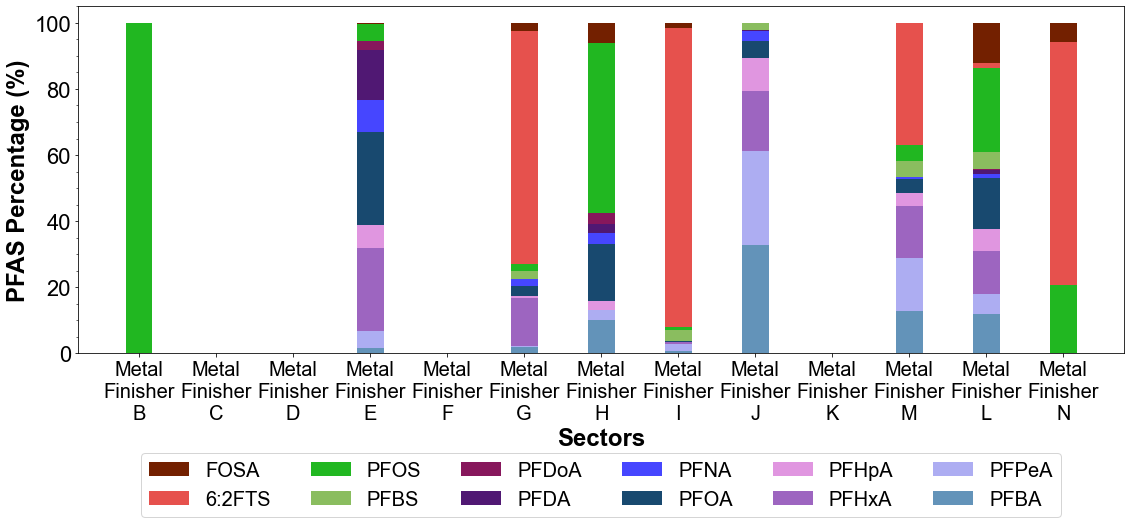

In [187]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='Percentage of Total PFAS Concentration (%)'
ylabel='PFAS Percentage (%)'

create_bar_chart(average_pivot=percentage_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=20, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

### PFAS Concentrations in ​Manholes by Contributing Land Use

#### Functions

In [ ]:
def create_custom_pivot_table(data_df, type_filter, start_date, end_date, qual_summary_filter,filter_pfas_compound=None):
    """
    Create a pivot table with specific filters, multi-level columns, and aggregation.

    Args:
        data_df (pd.DataFrame): The input dataframe containing the dataset.
        type_filter (list): A list of types to filter the 'Type' column.
        start_date (str): The start date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
        end_date (str): The end date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
        qual_summary_filter (list): A list of values to filter the 'Qual Summary (Grade for filtering)' column.
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: A pivot table based on the specified structure and filters.
    """
    # Convert 'Sample Date' to datetime format if not already
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    
    # Apply filters
    filtered_data = data_df[
        (data_df['Type'].isin(type_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)) &
        (data_df['PFAS Compound'].isin(filter_pfas_compound))
    ]
    
    # Create pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='Quant Incl Estimates Incl Qual Flags',
        index='PFAS Compound',
        columns=['Dominant Contributor', 'Sample Location'],
        aggfunc='mean'
    )
    
    return pivot_table

In [ ]:
def add_flow_row_to_pivot(pivot_df, flow_df):
    """
    Adds a new row with flow values to a given pivot table based on a mapping dataframe.

    Args:
        pivot_df (pd.DataFrame): The pivot table with PFAS compounds.
        flow_df (pd.DataFrame): The dataframe with flow information.

    Returns:
        pd.DataFrame: The updated pivot table with the added flow row.
    """
    # Create a mapping of Site to Predicted Flow from the flow dataframe
    flow_mapping = dict(zip(flow_df['Site'], flow_df['Predicted Flow (MGD)']))
    
    # Initialize a list to store flow values for each column in the pivot table
    flow_values = []

    # Iterate through the columns of the pivot table, which correspond to Sample Location
    for col in pivot_df.columns.levels[1]:  # Assuming the second level has 'Sample Location'
        # Get the flow value from the flow_mapping, if the column is in the mapping
        flow_value = flow_mapping.get(col, 0)  # Use 0 or NaN if the Site is not found
        flow_values.append(flow_value)

    # Add a new row for flow at the bottom of the pivot table
    # This assumes the pivot table has a MultiIndex on columns with 'Sample Location' on level 1
    flow_row = pd.DataFrame([flow_values], columns=pivot_df.columns, index=['Flow (MGD)'])

    # Append the new flow row to the pivot table
    updated_pivot_df = pd.concat([pivot_df, flow_row])

    return updated_pivot_df

In [ ]:
def calculate_weighted_averages(pivot_table):
    # Make a copy of the pivot table to avoid changing the original data
    pivot_table_copy = pivot_table.copy()
    
    # Convert all non-numeric types to NaN
    for col in pivot_table_copy.columns:
        pivot_table_copy[col] = pd.to_numeric(pivot_table_copy[col], errors='coerce')

    # Separate the flows from the rest of the pivot table data
    flows = pivot_table_copy.iloc[-1]  # Last row for flows
    pfas_compounds = pivot_table_copy.iloc[:-1]  # All but last row for PFAS compounds
    
    # Initialize a DataFrame to hold the flow-weighted averages, with the same index as pfas_compounds
    flow_weighted_avg_df = pd.DataFrame(index=pfas_compounds.index)

    # Calculate the flow-weighted averages for each PFAS compound
    for contributor in pfas_compounds.columns.get_level_values(0).unique():
        # Create a Series to store the weighted average for the current contributor
        weighted_avg_series = pd.Series(index=pfas_compounds.index, dtype=float)
        
        # Loop over each PFAS compound
        for compound in pfas_compounds.index:
            # Concentrations of the current PFAS compound across all sample locations for the contributor
            compound_concentrations = pfas_compounds.loc[compound, (contributor, slice(None))]

            # Corresponding flow rates for the contributor across all sample locations
            contributor_flows = flows[(contributor, slice(None))]
            
            # Calculate the weighted average for the current PFAS compound
            weighted_average = np.nansum(compound_concentrations * contributor_flows) / np.nansum(contributor_flows)
            
            # Assign the weighted average to the correct entry in the series
            weighted_avg_series[compound] = weighted_average
        
        # Assign the series to the correct column in the final DataFrame
        flow_weighted_avg_df[contributor+'_Weighted-Flow Avg'] = weighted_avg_series

    return flow_weighted_avg_df

In [ ]:
def calculate_StdError(pivot_table):
    # Make a copy of the pivot table to avoid changing the original data
    pivot_table_copy = pivot_table.copy()
    
    # Convert all non-numeric types to NaN
    for col in pivot_table_copy.columns:
        pivot_table_copy[col] = pd.to_numeric(pivot_table_copy[col], errors='coerce')

    # Separate the flows from the rest of the pivot table data
    flows = pivot_table_copy.iloc[-1]  # Last row for flows
    pfas_compounds = pivot_table_copy.iloc[:-1]  # All but last row for PFAS compounds
    
    # Initialize a DataFrame to hold the flow-weighted averages, with the same index as pfas_compounds
    Std_error_series_df = pd.DataFrame(index=pfas_compounds.index)

    # Calculate the flow-weighted averages for each PFAS compound
    for contributor in pfas_compounds.columns.get_level_values(0).unique():
        # Create a Series to store the weighted average for the current contributor
        Std_error_series = pd.Series(index=pfas_compounds.index, dtype=float)
        
        # Loop over each PFAS compound
        for compound in pfas_compounds.index:
            # Concentrations of the current PFAS compound across all sample locations for the contributor
            compound_concentrations = pfas_compounds.loc[compound, (contributor, slice(None))]
            
            # Calculate the weighted average for the current PFAS compound
            std_error = np.std(compound_concentrations, ddof=1)/np.sqrt(len(compound_concentrations))
            
            # Assign the weighted average to the correct entry in the series
            Std_error_series[compound] = std_error
        
        # Assign the series to the correct column in the final DataFrame
        Std_error_series_df[contributor+'_StdError'] = Std_error_series

    return Std_error_series_df



In [ ]:
def create_pfas_bar_chart(data_df, contributors, title=None, figsize=(12, 8),colors=None, title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.35
    x = np.arange(len(data_df))  # the label locations

    # Loop through each specified contributor
    for i, contributor in enumerate(contributors):
        avg_col = f"{contributor}_Weighted-Flow Avg"
        err_col = f"{contributor}_StdError"
        print(f"Plotting {avg_col} with errors from {err_col}...")  # Debug statement
        # Plot bars with error bars
        ax.bar(x + i * bar_width - bar_width/2, data_df[avg_col], bar_width, label=contributor,color=colors.get(contributor, 'grey'),
               yerr=data_df[err_col], capsize=5)

    # Adding customizations
    ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'PFAS Concentrations by Compound and Contributor', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels(data_df.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.set_ylim(bottom=0)
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'data_df' is the DataFrame with the correct columns
# contributors = ['Commercial and NSU Industrial', 'Domestic']
# create_pfas_bar_chart(data_df=data_df, contributors=contributors)





#### Filters and Settings

In [ ]:
#qual_summary_filter (list): A list of values to filter the 'Qual Summary (Grade for filtering)' column.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','','Probably okay','Probably ok']

#start_date (str): The start date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
start_date='2023-06-06'

#end_date (str): The end date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
end_date='2024-04-20'

#type_filter (list): A list of types to filter the 'Type' column.
type_filter=['Manhole']

filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid',
                        'Perfluoropentanesulfonic acid','Perfluorohexanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluoroheptanoic acid','Perfluorooctanoic acid (PFOA)','Perfluorooctanesulfonic acid (PFOS)',
                        'NMeFOSE','NEtFOSE','6:2 Fluorotelomersulfonic acid','Perfluorononanoic acid','Perfluorononanesulfonic acid',
                        'Perfluorodecanoic acid','Perfluorodecanesulfonic acid','Perfluoroundecanoic acid','Perfluorododecanesulfonic acid']

#### Create Pivot Table

In [ ]:
pivot_table=create_custom_pivot_table(data_df, type_filter, start_date, end_date, qual_summary_filter,filter_pfas_compound)
# Rename the index of data_df using the mapping (No need to change)
pivot_table.index = pivot_table.index.map(pfas_mapping)
#pivot_table.fillna('NS', inplace=True)
pivot_table

Dominant Contributor Commercial and NSU Industrial                             \
Sample Location                           MH#16331 MH#19788 MH#20615 MH#20723   
PFAS Compound                                                                   
6:2FTS                                       0.000    4.860    0.000   21.350   
NEtFOSE                                      0.000    0.000    0.000    0.000   
NMeFOSE                                        NaN    0.950    0.000    0.000   
PFBS                                         1.250    7.800    3.400    2.500   
PFBA                                         4.350    5.650    1.850    1.950   
PFDS                                         0.490    0.670    0.185    0.700   
PFDA                                         0.410    1.140    0.305    0.425   
PFDoS                                        0.215    0.775    0.215    0.000   
PFHpA                                        0.765    6.250    0.425    1.165   
PFHxS                                        2.100    3.750    1.200    1.250   
PFHxA                                        3.900   10.650    1.800    2.350   
PFNS                                         0.000    0.000    0.000    0.445   
PFNA                                         0.450    3.650    0.150    0.440   
PFOS                                         3.800   10.700    3.500   33.500   
PFOA                                         2.550   21.000    1.700    2.000   
PFPeS                                        0.000    0.520    0.165    0.000   
PFPeA                                        2.600   12.000    0.705    0.760   
PFUnA                                        0.000    0.345    0.000    0.000   

Dominant Contributor                   Domestic                   
Sample Location      MH#21070 MH#72360 MH#20788 MH#67882 MH#8402  
PFAS Compound                                                     
6:2FTS                  0.280    0.835    0.000    0.000   0.000  
NEtFOSE                11.500    0.000    0.000    1.400   0.950  
NMeFOSE                 0.000    0.000    1.600    0.000   3.800  
PFBS                    1.900    1.390    2.250    1.300   0.490  
PFBA                    3.550    6.900    1.950    0.600   1.550  
PFDS                    3.100    1.050    0.210    0.850   1.100  
PFDA                    0.000    0.360    0.740    0.000   0.195  
PFDoS                   0.285    0.165    0.000    0.325   0.000  
PFHpA                   1.350    2.950    0.825    0.340   0.835  
PFHxS                   4.800    0.800    4.600    1.600   2.400  
PFHxA                   6.650    5.850    2.700    0.000   2.550  
PFNS                    0.795    0.295    0.240    0.295   0.545  
PFNA                    0.635    0.440    0.380    0.115   0.165  
PFOS                    6.900    0.965    6.300    2.520   6.000  
PFOA                    4.050    2.800    2.700    0.740   2.950  
PFPeS                   0.190    0.000    0.700    0.000   2.750  
PFPeA                   4.850    7.050    1.395   28.300   0.440  
PFUnA                   0.000    0.000    0.240    0.000   0.000

#### Create Table for Flow Weighted Average for Industry 

In [ ]:
#Import data on predicted flow for manholes
sheet_name = 'June 2023 MH and Ind Flows'

# Rows to skip at the beginning of the sheet (0-indexed)
skiprows = 0  # If the first row is the header, we don't skip any rows

# The number of rows to read, after the header row
nrows = 9  # Number of rows to read, not including the header

# Read the Excel file
MH_flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skiprows, nrows=nrows, header=0)

MH_flows_df.head()  # Display the first few rows of the DataFrame

,Site,Category,Permitted Industries from list,Predicted Flow (MGD),Total Flow Subtracting Permitted Industries,Unnamed: 5,Unnamed: 6
0,MH#19788,Commercial and NSU Industrial,NaN,0.10080,0.100800,NaN,NaN
1,MH#72360,Commercial and NSU Industrial,"Acumed, Genentech",0.15120,0.104851,NaN,NaN
2,MH#16331,Commercial and NSU Industrial,NaN,0.06624,0.066240,NaN,NaN
3,MH#20615,Commercial and NSU Industrial,NaN,0.07776,0.077760,NaN,NaN
4,MH#21070,Commercial and NSU Industrial,NaN,0.60912,0.609120,NaN,NaN


In [ ]:
updated_pivot_table=add_flow_row_to_pivot(pivot_table, MH_flows_df)
updated_pivot_table

Dominant Contributor Commercial and NSU Industrial                    \
Sample Location                           MH#16331 MH#19788 MH#20615   
6:2FTS                                     0.00000   4.8600  0.00000   
NEtFOSE                                    0.00000   0.0000  0.00000   
NMeFOSE                                        NaN   0.9500  0.00000   
PFBS                                       1.25000   7.8000  3.40000   
PFBA                                       4.35000   5.6500  1.85000   
PFDS                                       0.49000   0.6700  0.18500   
PFDA                                       0.41000   1.1400  0.30500   
PFDoS                                      0.21500   0.7750  0.21500   
PFHpA                                      0.76500   6.2500  0.42500   
PFHxS                                      2.10000   3.7500  1.20000   
PFHxA                                      3.90000  10.6500  1.80000   
PFNS                                       0.00000   0.0000  0.00000   
PFNA                                       0.45000   3.6500  0.15000   
PFOS                                       3.80000  10.7000  3.50000   
PFOA                                       2.55000  21.0000  1.70000   
PFPeS                                      0.00000   0.5200  0.16500   
PFPeA                                      2.60000  12.0000  0.70500   
PFUnA                                      0.00000   0.3450  0.00000   
Flow (MGD)                                 0.06624   0.1008  0.07776   

Dominant Contributor                             Domestic                    
Sample Location       MH#20723 MH#21070 MH#72360 MH#20788 MH#67882  MH#8402  
6:2FTS                21.35000    0.280  0.83500  0.00000   0.0000  0.00000  
NEtFOSE                0.00000   11.500  0.00000  0.00000   1.4000  0.95000  
NMeFOSE                0.00000    0.000  0.00000  1.60000   0.0000  3.80000  
PFBS                   2.50000    1.900  1.39000  2.25000   1.3000  0.49000  
PFBA                   1.95000    3.550  6.90000  1.95000   0.6000  1.55000  
PFDS                   0.70000    3.100  1.05000  0.21000   0.8500  1.10000  
PFDA                   0.42500    0.000  0.36000  0.74000   0.0000  0.19500  
PFDoS                  0.00000    0.285  0.16500  0.00000   0.3250  0.00000  
PFHpA                  1.16500    1.350  2.95000  0.82500   0.3400  0.83500  
PFHxS                  1.25000    4.800  0.80000  4.60000   1.6000  2.40000  
PFHxA                  2.35000    6.650  5.85000  2.70000   0.0000  2.55000  
PFNS                   0.44500    0.795  0.29500  0.24000   0.2950  0.54500  
PFNA                   0.44000    0.635  0.44000  0.38000   0.1150  0.16500  
PFOS                  33.50000    6.900  0.96500  6.30000   2.5200  6.00000  
PFOA                   2.00000    4.050  2.80000  2.70000   0.7400  2.95000  
PFPeS                  0.00000    0.190  0.00000  0.70000   0.0000  2.75000  
PFPeA                  0.76000    4.850  7.05000  1.39500  28.3000  0.44000  
PFUnA                  0.00000    0.000  0.00000  0.24000   0.0000  0.00000  
Flow (MGD)             0.34704    0.108  0.60912  0.06192   0.1512  0.05904

#### Calculate Weighted Average

In [ ]:
table=calculate_weighted_averages(pivot_table=updated_pivot_table)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in table.index]
# Reorder the DataFrame
table = table.loc[filtered_order]

table

,Commercial and NSU Industrial_Weighted-Flow Avg,Domestic_Weighted-Flow Avg
PFBA,4.785919,1.113228
PFPeA,4.979901,16.135053
PFHxA,5.018427,1.167460
PFHpA,2.338289,0.557725
PFOA,4.014576,1.665344
PFNA,0.686562,0.186138
PFDA,0.406859,0.210661
PFUnA,0.026568,0.054603
PFBS,2.332310,1.340423
PFPeS,0.065523,0.755820


#### Calculate Standard Error

In [ ]:
table_error=calculate_StdError(pivot_table=updated_pivot_table)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in table_error.index]
# Reorder the DataFrame
table_error = table_error.loc[filtered_order]

table_error

,Commercial and NSU Industrial_StdError,Domestic_StdError
PFBA,0.822032,0.400347
PFPeA,1.776883,9.131662
PFHxA,1.336663,0.876071
PFHpA,0.893571,0.163359
PFOA,3.081306,0.698737
PFNA,0.541563,0.081292
PFDA,0.153769,0.221441
PFUnA,0.057500,0.080000
PFBS,1.005070,0.508604
PFPeS,0.082890,0.825126


#### Combine Tables for Weighted and Standard Error

In [ ]:
# Now, concatenate them side-by-side
combined_df = pd.concat([table, table_error], axis=1)
combined_df

,Commercial and NSU Industrial_Weighted-Flow Avg,Domestic_Weighted-Flow Avg,Commercial and NSU Industrial_StdError,Domestic_StdError
PFBA,4.785919,1.113228,0.822032,0.400347
PFPeA,4.979901,16.135053,1.776883,9.131662
PFHxA,5.018427,1.167460,1.336663,0.876071
PFHpA,2.338289,0.557725,0.893571,0.163359
PFOA,4.014576,1.665344,3.081306,0.698737
PFNA,0.686562,0.186138,0.541563,0.081292
PFDA,0.406859,0.210661,0.153769,0.221441
PFUnA,0.026568,0.054603,0.057500,0.080000
PFBS,2.332310,1.340423,1.005070,0.508604
PFPeS,0.065523,0.755820,0.082890,0.825126


#### Create Bar Chart for PFAS Concentration for Each Compound Comparing Commercial vs Domestic

In [ ]:
def create_pfas_bar_chart(data_df, contributors, title=None, figsize=(12, 8), colors=None, 
                          title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    num_contributors = len(contributors)
    bar_width = 0.35  # Width of each individual bar
    group_width = num_contributors * bar_width + (num_contributors - 1) * 0.1  # Total width of all bars including gaps
    x = np.arange(len(data_df))  # the label locations

    # Loop through each specified contributor
    for i, contributor in enumerate(contributors):
        avg_col = f"{contributor}_Weighted-Flow Avg"
        err_col = f"{contributor}_StdError"
        offset = (i * bar_width + i * 0.05) - group_width / 2 + bar_width / 2  # Calculating the offset for each bar group
        print(f"Plotting {avg_col} with errors from {err_col}...")  # Debug statement
        # Plot bars with error bars
        ax.bar(x + offset, data_df[avg_col], bar_width, label=contributor, color=colors.get(contributor, 'grey'),
               yerr=data_df[err_col], capsize=5)

    # Adding customizations
    ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'PFAS Concentrations by Compound and Contributor', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels(data_df.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.set_ylim(bottom=0)  # Ensure the y-axis starts from zero
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()


Plotting Commercial and NSU Industrial_Weighted-Flow Avg with errors from Commercial and NSU Industrial_StdError...
Plotting Domestic_Weighted-Flow Avg with errors from Domestic_StdError...


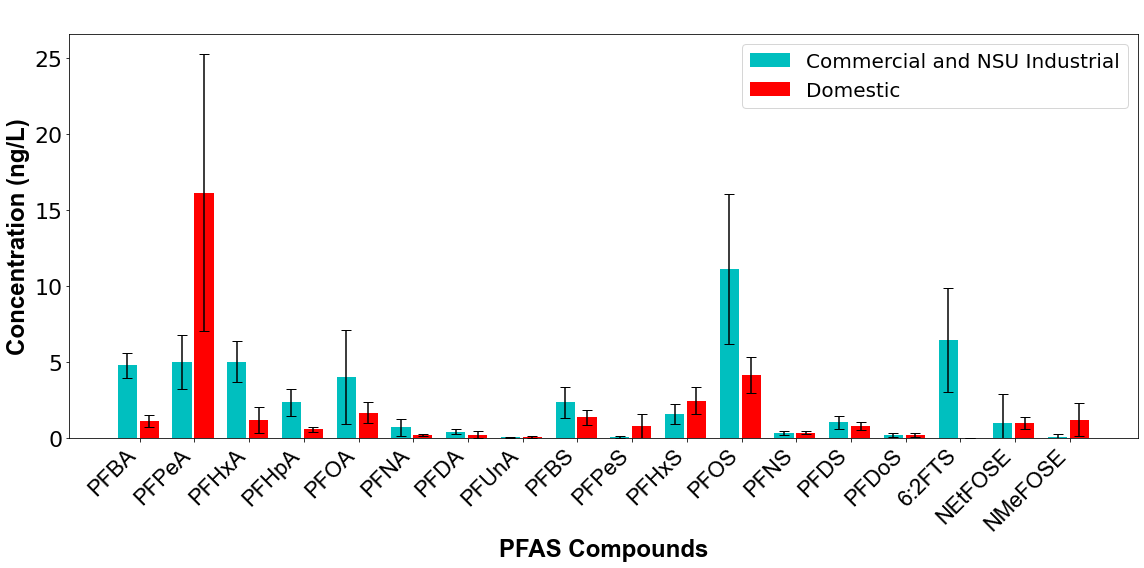

In [ ]:
colors = {
    'Commercial and NSU Industrial': '#00BFBF',  # Blue color
    'Domestic': 'red'  # Red color
}
contributors = ['Commercial and NSU Industrial', 'Domestic']

create_pfas_bar_chart(data_df=combined_df,contributors=contributors, colors=colors, title=' ', figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20)


### Effects of Source Control Efforts – Mass Balance

#### Functions

In [161]:
def create_stacked_bar_chart(data_df, figsize=(12, 8),colors_dict=None, title=None, title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a stacked bar chart to compare PFAS concentrations across different scenarios.
    
    Args:
        data_df (pd.DataFrame): DataFrame with scenarios as rows and categories as columns.
        title (str, optional): Title for the chart.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties

    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    # Setup the figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    categories = data_df.columns[1:]  # Excluding the first column which contains the scenario names
    scenarios = data_df['WRRF/Scenario']
    x = np.arange(len(scenarios))  # Numeric indices for the x-axis positions
    width = 0.35  # Bar width

    # Function to split scenario labels if too long
    def split_label(label, max_length=10):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        return '\n'.join(split_labels)

    # Bottom tracker for each bar stack
    bottom = pd.Series([0]*len(data_df))

    # Iterate over each category to plot
    for category in categories:
        color = colors_dict.get(category, 'grey')  # Default to grey if category not found in dictionary
        ax.bar(x, data_df[category], width, bottom=bottom, label=category, color=color)
        bottom += data_df[category]  # Update bottom height to stack the next bar on top

    # Adding customizations
    ax.set_xlabel(' ', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Total PFAS Mass Flux (mg/day)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'Total PFAS Mass by Scenario and Category', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels([split_label(scenario) for scenario in scenarios], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    plt.tight_layout()
    plt.show()


#### Import Data

In [163]:
#Import data on predicted flow for manholes
sheet_name = 'Sector MB Summary'

# Rows to skip at the beginning of the sheet (0-indexed)
skiprows = 131  # If the first row is the header, we don't skip any rows

# The number of rows to read, after the header row
nrows = 8  # Number of rows to read, not including the header

# Read the Excel file
Sector_MassBalance_df = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skiprows, nrows=nrows, header=0)

Sector_MassBalance_df.drop('Unnamed: 0', axis=1, inplace=True)
Sector_MassBalance_df=Sector_MassBalance_df[['WRRF/Scenario','Domestic','Non-Domestic','Large Semiconductor','Landfill','Semiconductor & Metal Finisher Campus','Other Wet Industries']]

Sector_MassBalance_df['WRRF/Scenario'] = Sector_MassBalance_df['WRRF/Scenario'].str.replace('Rock Creek', 'RC')
Sector_MassBalance_df['WRRF/Scenario'] = Sector_MassBalance_df['WRRF/Scenario'].str.replace('Forest Grove', 'FG')
Sector_MassBalance_df['WRRF/Scenario'] = Sector_MassBalance_df['WRRF/Scenario'].str.replace('Hillsboro', 'HB')
Sector_MassBalance_df['WRRF/Scenario'] = Sector_MassBalance_df['WRRF/Scenario'].str.replace('Durham', 'DM')

Sector_MassBalance_df

,WRRF/Scenario,Domestic,Non-Domestic,Large Semiconductor,Landfill,Semiconductor & Metal Finisher Campus,Other Wet Industries
0,FG WRRF,227.238467,64.121188,0.000000,0.000000,0.000000,50.703506
1,HB WRRF,247.425623,105.473981,0.000000,0.000000,0.000000,3.126554
2,RC 2019,1891.460997,628.980048,6856.772229,5445.150961,0.000000,2303.206993
3,RC 2020-2022,1891.460997,628.980048,87.202668,5445.150961,0.000000,2303.206993
4,RC March 2023,1898.079342,631.180890,87.202668,0.000000,0.000000,2303.206993
5,RC April 2023,1894.817158,630.096094,87.202668,1880.735457,0.000000,2303.206993
6,DM 2019-2020,1197.093044,717.771200,0.000000,0.000000,4820.143102,5.648469
7,DM 2021-2023,1197.093044,717.771200,0.000000,0.000000,372.167858,5.648469


#### Create Stacked Bar for PFAS Mass

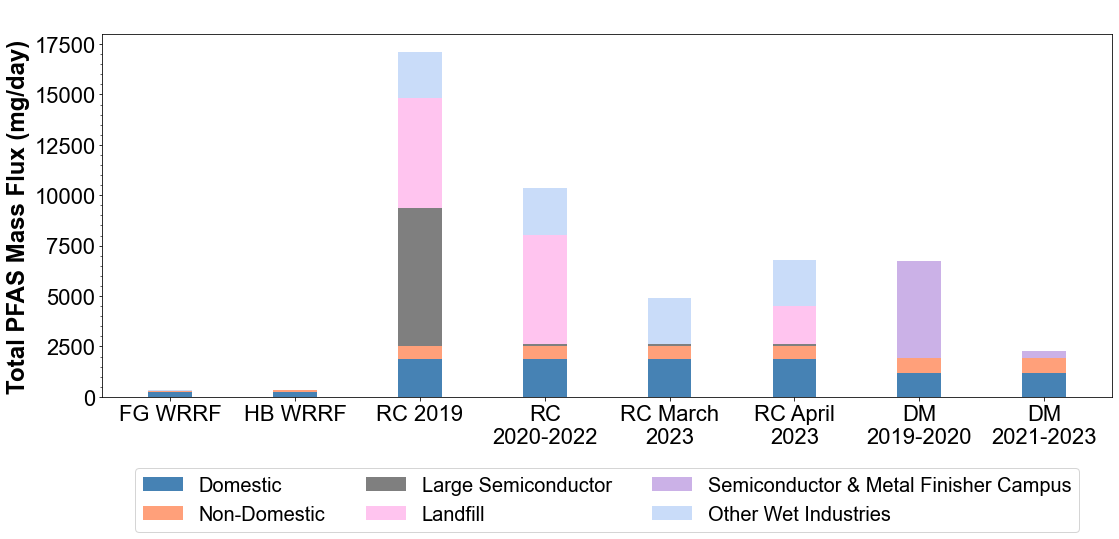

In [170]:
colors_dict = {
    'Domestic': '#4682B4', 
    'Non-Domestic': '#FFA07A',  
    'Large Semiconductor': '#7f7f7f',  
    'Landfill': '#ffc4ef',  
    'Semiconductor & Metal Finisher Campus': '#cbb1e7',  
    'Other Wet Industries': '#c9dcf9'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

#### Convert Total PFAS Mass to % of PFAS Mass

In [159]:
Sector_MassBalance_df["Total PFAS Mass"]=Sector_MassBalance_df["Domestic"]+Sector_MassBalance_df["Non-Domestic"]+Sector_MassBalance_df["Large Semiconductor"]+Sector_MassBalance_df["Landfill"]+Sector_MassBalance_df["Semiconductor & Metal Finisher Campus"]+Sector_MassBalance_df["Other Wet Industries"]
Sector_MassBalance_df['Domestic %']=Sector_MassBalance_df["Domestic"]/Sector_MassBalance_df["Total PFAS Mass"]*100
Sector_MassBalance_df['Non-Domestic %']=Sector_MassBalance_df["Non-Domestic"]/Sector_MassBalance_df["Total PFAS Mass"]*100
Sector_MassBalance_df['Large Semiconductor %']=Sector_MassBalance_df["Large Semiconductor"]/Sector_MassBalance_df["Total PFAS Mass"]*100
Sector_MassBalance_df['Landfill %']=Sector_MassBalance_df["Landfill"]/Sector_MassBalance_df["Total PFAS Mass"]*100
Sector_MassBalance_df['Semiconductor & Metal Finisher Campus %']=Sector_MassBalance_df["Semiconductor & Metal Finisher Campus"]/Sector_MassBalance_df["Total PFAS Mass"]*100
Sector_MassBalance_df['Other Wet Industries %']=Sector_MassBalance_df["Other Wet Industries"]/Sector_MassBalance_df["Total PFAS Mass"]*100

Sector_MassBalance_df_percent=Sector_MassBalance_df[['WRRF/Scenario','Domestic %','Non-Domestic %','Large Semiconductor %','Landfill %','Semiconductor & Metal Finisher Campus %',
                                                     'Other Wet Industries %']]

Sector_MassBalance_df_percent.columns=Sector_MassBalance_df_percent.columns.str.replace('%','')
Sector_MassBalance_df_percent

,WRRF/Scenario,Domestic,Non-Domestic,Large Semiconductor,Landfill,Semiconductor & Metal Finisher Campus,Other Wet Industries
0,FG WRRF,66.431728,18.745423,0.000000,0.000000,0.000000,14.822849
1,HB WRRF,69.496473,29.625346,0.000000,0.000000,0.000000,0.878181
2,RC 2019,11.044659,3.672754,40.038210,31.795441,0.000000,13.448935
3,RC 2020-2022,18.264394,6.073580,0.842050,52.579665,0.000000,22.240311
4,RC March 2023,38.581437,12.829741,1.772531,0.000000,0.000000,46.816291
5,RC April 2023,27.881120,9.271493,1.283136,27.673916,0.000000,33.890336
6,DH 2019-2020,17.759296,10.648388,0.000000,0.000000,71.508518,0.083797
7,DH 2021-2023,52.213686,31.307074,0.000000,0.000000,16.232870,0.246370


#### Create stacked Bar for Percentage of PFAS Mass

In [155]:
def create_stacked_bar_chart(data_df, figsize=(12, 8),colors_dict=None, title=None, title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a stacked bar chart to compare PFAS concentrations across different scenarios.
    
    Args:
        data_df (pd.DataFrame): DataFrame with scenarios as rows and categories as columns.
        title (str, optional): Title for the chart.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties

    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    # Setup the figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    categories = data_df.columns[1:]  # Excluding the first column which contains the scenario names
    scenarios = data_df['WRRF/Scenario']
    x = np.arange(len(scenarios))  # Numeric indices for the x-axis positions
    width = 0.35  # Bar width

    # Function to split scenario labels if too long
    def split_label(label, max_length=10):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        return '\n'.join(split_labels)

    # Bottom tracker for each bar stack
    bottom = pd.Series([0]*len(data_df))

    # Iterate over each category to plot
    for category in categories:
        color = colors_dict.get(category, 'grey')  # Default to grey if category not found in dictionary
        ax.bar(x, data_df[category], width, bottom=bottom, label=category, color=color)
        bottom += data_df[category]  # Update bottom height to stack the next bar on top

    # Adding customizations
    ax.set_xlabel(' ', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Percent PFAS Mass Flux (%)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'Total PFAS Mass by Scenario and Category', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels([split_label(scenario) for scenario in scenarios], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    plt.tight_layout()
    plt.show()

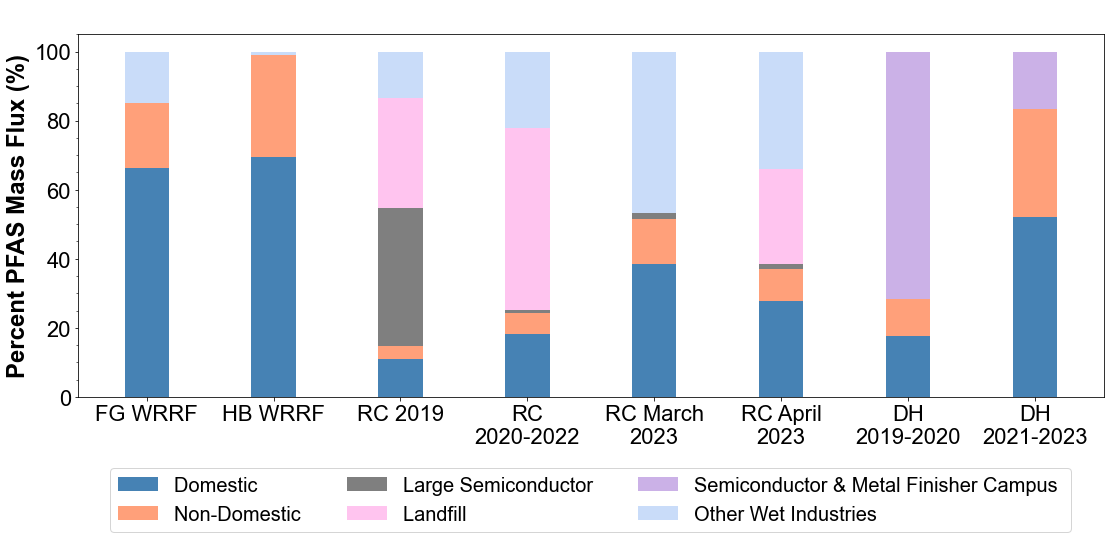

In [161]:
colors_dict = {
    'Domestic ': '#4682B4', 
    'Non-Domestic ': '#FFA07A',  
    'Large Semiconductor ': '#7f7f7f',  
    'Landfill ': '#ffc4ef',  
    'Semiconductor & Metal Finisher Campus ': '#cbb1e7',  
    'Other Wet Industries ': '#c9dcf9'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df_percent,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

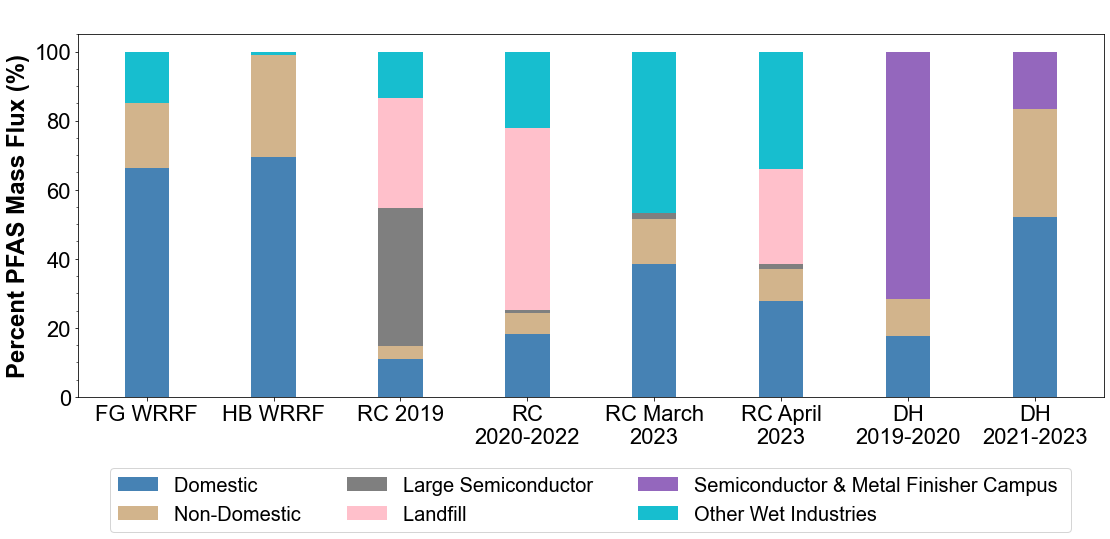

In [163]:
colors_dict = {
    'Domestic ': '#4682B4', 
    'Non-Domestic ': '#D2B48C',  #good
    'Large Semiconductor ': '#7f7f7f',  #good
    'Landfill ': '#FFC0CB',  
    'Semiconductor & Metal Finisher Campus ': '#9467bd',  
    'Other Wet Industries ': '#17becf'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df_percent,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

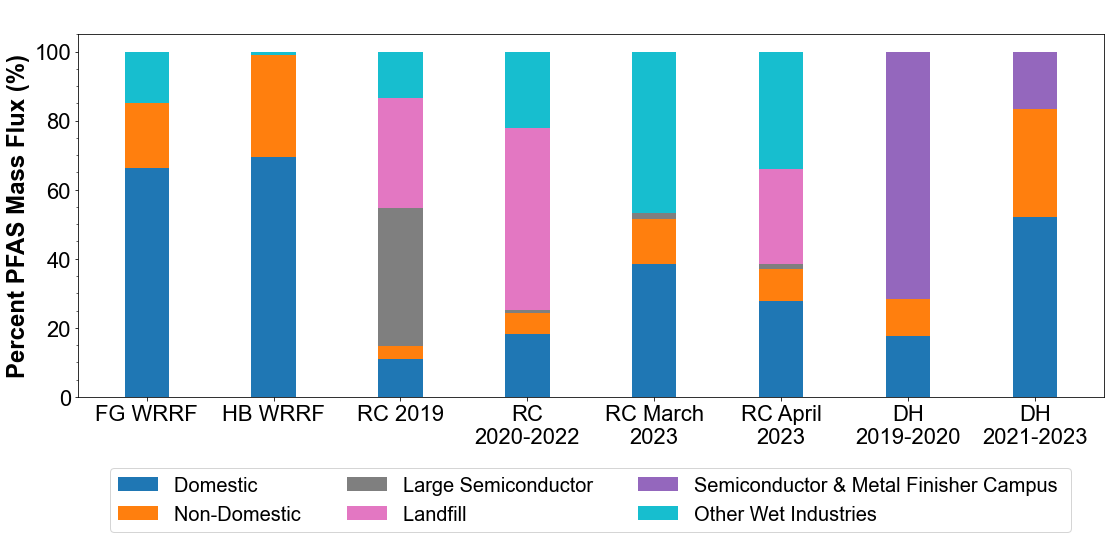

In [164]:
colors_dict = {
    'Domestic ': '#1f77b4', 
    'Non-Domestic ': '#ff7f0e',  #good
    'Large Semiconductor ': '#7f7f7f',  #good
    'Landfill ': '#e377c2',  
    'Semiconductor & Metal Finisher Campus ': '#9467bd',  
    'Other Wet Industries ': '#17becf'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df_percent,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

### Mass Balance June 2023

#### Import Flows

In [13]:
# Specify the sheet name or index
#2023
sheet_to_read = 'June 2023 Ambient Flows'

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 06-10-2024.xlsm'
# Since you want to start at row 15, you need to skip the first 14 rows (considering the first row as row 1)
# Note: pandas uses 0-based indexing, so row 15 in Excel is row 14 in pandas, hence skiprows=14
skiprows = 1

# Number of rows to read starting from row 15 to row 87 is 87 - 15 + 1 = 73
# +1 because the end row is inclusive
nrows = 18

# Read the specified range of rows from the specified sheet
Flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_to_read, skiprows=skiprows, nrows=nrows)

Flows_df.head()

,Unnamed: 0,WRRF Effluents for Ambient,June 2023 Flow (cfs),Source Notes,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
0,NaN,TR @ Cherry Grove,68.0,OWRD 14202510,25461.924347,21549.382949,3661.284345,251.257053,477.086571,0.846338,0.143794,0.009868,0.018737,NaN,NaN
1,NaN,Scoggins Below Hagg,170.0,OWRD 14202980,4951.660999,3194.021900,1547.320000,210.319099,211.557982,0.645041,0.312485,0.042474,0.042725,NaN,NaN
2,Trib,Gales @ Stringtown,50.0,OWRD 14204530,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
3,NaN,TR @ Fernhill,140.0,"No Gage, used Golf Course since no tribs betwe...",136872.565188,98254.411496,34653.435124,3964.718568,3537.833545,0.717853,0.253180,0.028966,0.025848,NaN,Scoggins + Gales
4,Effluent,Forest Grove Effluent,0.0,being transferred from May 23 to June 10th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Flows_df.set_index('WRRF Effluents for Ambient', inplace=True)
Flows_df.head()

,Unnamed: 0,June 2023 Flow (cfs),Source Notes,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
WRRF Effluents for Ambient,,,,,,,,,,,,,,
TR @ Cherry Grove,NaN,68.0,OWRD 14202510,25461.924347,21549.382949,3661.284345,251.257053,477.086571,0.846338,0.143794,0.009868,0.018737,NaN,NaN
Scoggins Below Hagg,NaN,170.0,OWRD 14202980,4951.660999,3194.021900,1547.320000,210.319099,211.557982,0.645041,0.312485,0.042474,0.042725,NaN,NaN
Gales @ Stringtown,Trib,50.0,OWRD 14204530,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
TR @ Fernhill,NaN,140.0,"No Gage, used Golf Course since no tribs betwe...",136872.565188,98254.411496,34653.435124,3964.718568,3537.833545,0.717853,0.253180,0.028966,0.025848,NaN,Scoggins + Gales
Forest Grove Effluent,Effluent,0.0,being transferred from May 23 to June 10th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Define Functions

In [43]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.
        column_name (string): Name of the column to use for the pivot table values.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values=column_name,
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [44]:
def convert_to_mg_per_day_and_sum(df):
    # Copy the dataframe to avoid changing the original one
    converted_df = df.copy()

    # Add a new column for total PFAS initially with zeros
    converted_df['PFAS Total'] = 0.0

    # Convert ng/L to mg/day for each cell, excluding the 'PFAS Assumption' and 'Permitted Flow (MGD)' rows
    for column in converted_df.columns[:-1]:  # exclude the 'Total PFAS' column
        total_pfas = 0
        for index, value in converted_df.loc[:, column].iteritems():
            if index not in ['PFAS Total', 'Flow (cfs)'] and pd.notna(value):
                # Get the flow in MGD for the current column
                flow_mgd = converted_df.at['Flow (cfs)', column]
                # Check if the flow is not NaN before proceeding with the calculation
                if pd.notna(flow_mgd):
                    # Convert ng/L to mg/day
                    converted_value = (value * flow_mgd * 2.446524)  # ng/L*cfs to mg/day conversion
                    converted_df.at[index, column] = converted_value
                    total_pfas += converted_value

        # Assign the sum to the 'Total PFAS' column for the current column
        converted_df.at['PFAS Total', column] = total_pfas

    return converted_df

In [45]:
def create_pfass_bar_chart(pfas_table, estimated_locations, measured_location, colors,
                           figsize=(12, 8), title='PFAS Mass (mg/day) per Compound',
                           title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart that groups 'Est' (stacked) and 'Meas' (single) values for PFAS compounds.

    Args:
        pfas_table (pd.DataFrame): DataFrame with multi-level columns for each PFAS compound.
        estimated_locations (list): List of locations contributing to 'Est' values.
        measured_location (str): Single location contributing to 'Meas' values.
        colors (dict): Dictionary mapping locations to colors.
        figsize (tuple): Figure size.
        title (str): Chart title.
        title_fontsize (int): Font size for the title.
        axis_label_fontsize (int): Font size for the x and y axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        fig, ax = plt.subplots(figsize=figsize)
        compounds = pfas_table.columns.get_level_values(0).unique()
        n_groups = len(compounds)
        bar_width = 0.35
        index = np.arange(n_groups) * 2  # Increase spacing between groups
        gap_between_est_meas = 0.05  # Added gap between "Estimated" and "Measured"

        legend_handles = []

        for i, compound in enumerate(compounds):
            est_pos = index[i] - gap_between_est_meas / 2
            meas_pos = index[i] + bar_width + gap_between_est_meas / 2

            estimated_bottom = 0
            for loc in estimated_locations:
                height = pfas_table.loc[loc, (compound, 'Estimated')]
                bar = ax.bar(est_pos, height, bar_width, bottom=estimated_bottom, color=colors[loc], label=f"{loc}" if i == 0 else "")
                estimated_bottom += height
                if i == 0 and height > 0:
                    legend_handles.append(bar)

            measured_height = pfas_table.loc[measured_location, (compound, 'Measured')]
            if measured_height > 0:
                bar = ax.bar(meas_pos, measured_height, bar_width, color=colors[measured_location], label=f"{measured_location}" if i == 0 else "")
                if i == 0:
                    legend_handles.append(bar)

        ax.set_xticks(index + bar_width / 2)
        compound_labels = [f"{comp}\nEst  Meas" for comp in compounds]
        ax.xaxis.set_major_locator(FixedLocator(index + bar_width / 2))
        ax.xaxis.set_major_formatter(FixedFormatter(compound_labels))

        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize)
        ax.set_ylabel('PFAS Mass (mg/day)', fontsize=axis_label_fontsize)
        ax.set_title(title, fontsize=title_fontsize)
        ax.legend(handles=legend_handles, bbox_to_anchor=(0.5, -0.15), loc='upper center', title='Sample Locations', ncol=4, fontsize=legend_fontsize,title_fontsize=legend_fontsize+2)

        plt.xticks(fontsize=tick_label_fontsize)
        plt.yticks(fontsize=tick_label_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### Set Filters and Settings

In [116]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']

#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient','Effluent']

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                        'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Fanno at Durham Rd','Gales @ Stringtown','Rock @ Brookwood',
                          'Scoggins Below Hagg','TR @ Boones Ferry','TR @ Cherry Grove','TR @ Farmington','TR @ Fernhill','TR @ Golf Course','TR @ Jurgens',
                          'TR @ Rood Br','Durham Effluent','Rock Creek Effluent','Forest Grove Effluent']

#column_name (string): Name of the column to use for the pivot table values.
column_name='All (w BDL= MDL/2) Incl Qual Flags'

# Lists provided by the user

#Rock Creek Confluence
#estimated_sample_location = ['TR @ Rood Br','Rock Creek Effluent','Rock @ Brookwood']
#measured_sample_location = ['TR @ Farmington']

#estimated_locations = estimated_sample_location
#measured_location = 'TR @ Farmington'

#Fanno Creek Confluence
estimated_sample_location = ['TR @ Jurgens','Durham Effluent','Fanno at Durham Rd']
measured_sample_location = ['TR @ Boones Ferry']

estimated_locations = estimated_sample_location
measured_location = 'TR @ Boones Ferry'

colors = {
    'TR @ Rood Br': (173/255, 173/255, 242/255),
    'Rock Creek Effluent': (205/255, 69/255, 109/255),
    'Rock @ Brookwood': (230/255, 120/255, 77/255),
    'TR @ Farmington': (53/255, 158/255, 112/255),
    'Forest Grove Effluent': (230/255, 216/255, 77/255),
    'Durham Effluent': (47/255,135/255,139/255),
    'TR @ Jurgens':(173/255, 173/255, 242/255),
    'Durham Effluent': (205/255, 69/255, 109/255),
    'Fanno at Durham Rd':(230/255, 120/255, 77/255),
    'TR @ Boones Ferry':(53/255, 158/255, 112/255)
}


In [117]:
#2023 Data
#start_date (str): Start date for filtering 'Sample Date'.
start_date='2023-06-01'

#end_date (str): End date for filtering 'Sample Date'.
end_date='2023-09-30'

#### Create Pivot Table

In [118]:
Allpivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name)
Allpivot_table=Allpivot_table.transpose().reset_index(level=0, drop=True)
# Rename the index of data_df using the mapping (No need to change)
Allpivot_table.columns = Allpivot_table.columns.map(pfas_mapping)

# Add a column to sum all PFAS concentrations per location
Allpivot_table['PFAS Total'] = Allpivot_table.sum(axis=1)

# Map 'June 2023 Flow (cfs)' from Flows_df to the new column in pivot_table
Allpivot_table['Flow (cfs)'] = Allpivot_table.index.map(Flows_df['June 2023 Flow (cfs)'])

Allpivot_table

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total,Flow (cfs)
Sample Location,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.95,0.470,0.14,0.47,0.600,1.200,0.095,0.32,1.600,1.20,0.140,1.50,8.685,6.597900
Dairy @ Hwy 8,0.13,0.435,0.13,0.29,0.240,0.590,0.085,0.31,0.990,0.88,0.130,0.68,4.890,85.000000
Fanno at Durham Rd,5.60,4.100,1.30,2.90,5.000,5.900,1.100,0.38,14.000,7.30,0.580,6.20,54.360,7.000000
Gales @ Stringtown,0.14,0.470,0.14,0.14,0.095,NaN,0.095,0.36,0.235,0.34,0.140,0.14,2.295,50.000000
Rock @ Brookwood,4.90,4.400,0.96,2.10,3.300,5.000,0.940,0.37,9.700,5.00,0.380,5.90,42.950,15.560589
Scoggins Below Hagg,0.14,0.470,0.14,0.14,0.095,0.095,0.095,0.14,0.235,0.14,0.140,0.14,1.970,170.000000
TR @ Boones Ferry,2.70,4.700,0.37,1.20,1.000,3.500,0.300,0.32,2.700,2.40,0.140,3.40,22.730,345.759774
TR @ Cherry Grove,0.15,0.500,0.15,0.15,0.100,0.250,0.100,0.47,0.250,0.15,0.150,0.15,2.570,68.000000
TR @ Farmington,2.00,4.500,0.34,1.10,0.760,2.800,0.260,0.51,2.100,1.70,0.135,2.60,18.805,281.000000


#### Convert Concentration to Mass

In [119]:
mass_pivot= convert_to_mg_per_day_and_sum(Allpivot_table.T).T
mass_pivot

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total,Flow (cfs)
Sample Location,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,15.334825,7.586703,2.259869,7.586703,9.685152,19.370305,1.533482,5.165415,25.827073,19.370305,2.259869,24.212881,140.192581,6.597900
Dairy @ Hwy 8,27.034090,90.460225,27.034090,60.306817,49.909090,122.693179,17.676136,64.465907,205.874995,182.999995,27.034090,141.409087,1016.897701,85.000000
Fanno at Durham Rd,95.903741,70.215239,22.263368,49.664437,85.628340,101.041441,18.838235,6.507754,239.759352,125.017376,9.932887,106.179142,930.951312,7.000000
Gales @ Stringtown,17.125668,57.493314,17.125668,17.125668,11.620989,NaN,11.620989,44.037432,28.746657,41.590908,17.125668,17.125668,280.738629,50.000000
Rock @ Brookwood,186.539839,167.505162,36.546581,79.945645,125.628871,190.346774,35.785194,14.085661,369.272742,190.346774,14.466355,224.609194,1635.078792,15.560589
Scoggins Below Hagg,58.227271,195.477268,58.227271,58.227271,39.511363,39.511363,39.511363,58.227271,97.738634,58.227271,58.227271,58.227271,819.340888,170.000000
TR @ Boones Ferry,2283.955883,3975.775055,312.986547,1015.091503,845.909586,2960.683552,253.772876,270.691068,2283.955883,2030.183007,118.427342,2876.092593,19227.524894,345.759774
TR @ Cherry Grove,24.954545,83.181816,24.954545,24.954545,16.636363,41.590908,16.636363,78.190907,41.590908,24.954545,24.954545,24.954545,427.554534,68.000000
TR @ Farmington,1374.946488,3093.629598,233.740903,756.220568,522.479665,1924.925083,178.743043,350.611354,1443.693812,1168.704515,92.808888,1787.430434,12927.934353,281.000000


In [120]:
#Filter Table for Sample Locations that are actually needed for the analysis.
#Rock Creek
#mass_pivot_filtered=mass_pivot.loc[['TR @ Rood Br','Rock Creek Effluent','Rock @ Brookwood','TR @ Farmington']].drop('Flow (cfs)', axis=1)
#Fanno Creek
mass_pivot_filtered=mass_pivot.loc[['TR @ Jurgens','Durham Effluent','Fanno at Durham Rd','TR @ Boones Ferry']].drop('Flow (cfs)', axis=1)

mass_pivot_filtered

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total
Sample Location,,,,,,,,,,,,,
TR @ Jurgens,1296.963079,3738.305347,282.280200,747.661069,740.031875,2288.758375,267.021810,373.830535,1678.422809,1525.838917,106.808724,2517.634213,15563.556953
Durham Effluent,256.871393,395.186758,48.081056,131.728919,72.450906,586.193691,59.278014,9.221024,263.457839,329.322299,9.221024,724.509057,2885.521980
Fanno at Durham Rd,95.903741,70.215239,22.263368,49.664437,85.628340,101.041441,18.838235,6.507754,239.759352,125.017376,9.932887,106.179142,930.951312
TR @ Boones Ferry,2283.955883,3975.775055,312.986547,1015.091503,845.909586,2960.683552,253.772876,270.691068,2283.955883,2030.183007,118.427342,2876.092593,19227.524894


#### Create Table for Estimated vs Measured

In [121]:
# Creating a new DataFrame with two level columns
new_columns = pd.MultiIndex.from_product([mass_pivot_filtered.columns, ['Estimated', 'Measured']])
new_table = pd.DataFrame(index=mass_pivot_filtered.index, columns=new_columns)

# Populating the new table based on the user lists
for comp in mass_pivot_filtered.columns:
    new_table[(comp, 'Estimated')] = np.where(mass_pivot_filtered.index.isin(estimated_sample_location), mass_pivot_filtered[comp], np.nan)
    new_table[(comp, 'Measured')] = np.where(mass_pivot_filtered.index.isin(measured_sample_location), mass_pivot_filtered[comp], np.nan)

new_table

PFAS Compound              PFBS                      PFBA               \
                      Estimated     Measured    Estimated     Measured   
Sample Location                                                          
TR @ Jurgens        1296.963079          NaN  3738.305347          NaN   
Durham Effluent      256.871393          NaN   395.186758          NaN   
Fanno at Durham Rd    95.903741          NaN    70.215239          NaN   
TR @ Boones Ferry           NaN  2283.955883          NaN  3975.775055   

PFAS Compound             PFDA                   PFHpA               \
                     Estimated    Measured   Estimated     Measured   
Sample Location                                                       
TR @ Jurgens        282.280200         NaN  747.661069          NaN   
Durham Effluent      48.081056         NaN  131.728919          NaN   
Fanno at Durham Rd   22.263368         NaN   49.664437          NaN   
TR @ Boones Ferry          NaN  312.986547         NaN  1015.091503   

PFAS Compound            PFHxS              ...         PFOS               \
                     Estimated    Measured  ...    Estimated     Measured   
Sample Location                             ...                             
TR @ Jurgens        740.031875         NaN  ...  1678.422809          NaN   
Durham Effluent      72.450906         NaN  ...   263.457839          NaN   
Fanno at Durham Rd   85.628340         NaN  ...   239.759352          NaN   
TR @ Boones Ferry          NaN  845.909586  ...          NaN  2283.955883   

PFAS Compound              PFOA                    PFPeS              \
                      Estimated     Measured   Estimated    Measured   
Sample Location                                                        
TR @ Jurgens        1525.838917          NaN  106.808724         NaN   
Durham Effluent      329.322299          NaN    9.221024         NaN   
Fanno at Durham Rd   125.017376          NaN    9.932887         NaN   
TR @ Boones Ferry           NaN  2030.183007         NaN  118.427342   

PFAS Compound             PFPeA                 PFAS Total                
                      Estimated     Measured     Estimated      Measured  
Sample Location                                                           
TR @ Jurgens        2517.634213          NaN  15563.556953           NaN  
Durham Effluent      724.509057          NaN   2885.521980           NaN  
Fanno at Durham Rd   106.179142          NaN    930.951312           NaN  
TR @ Boones Ferry           NaN  2876.092593           NaN  19227.524894  

[4 rows x 26 columns]

#### Create Stacked Figure for Estimated vs Measured PFAS Mass

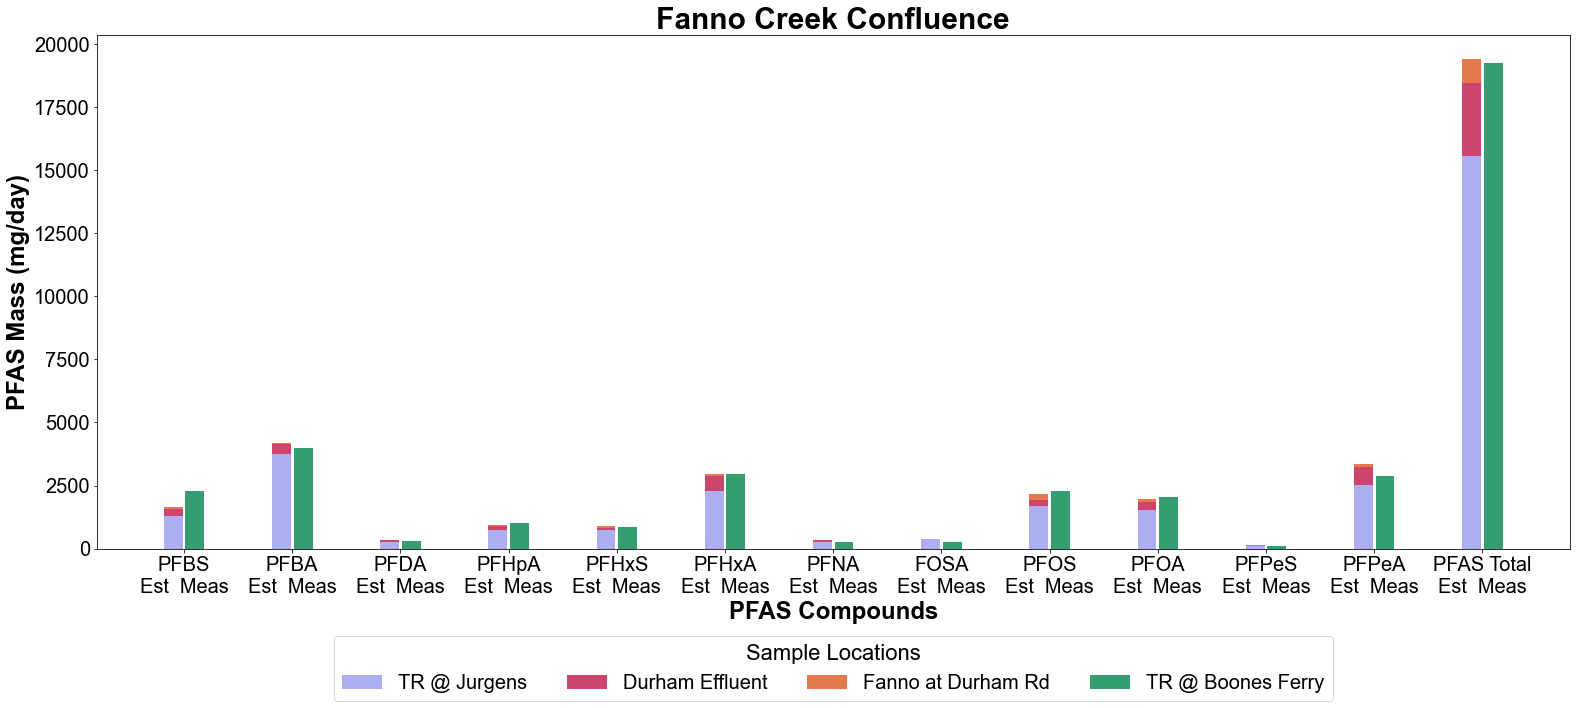

In [122]:
create_pfass_bar_chart(pfas_table=new_table,estimated_locations=estimated_locations,measured_location=measured_location , colors=colors,
                           figsize=(22, 10), title='Fanno Creek Confluence',
                            title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

### PFAS Mass Balance February

#### Import Ambient Flows

In [182]:
# Specify the sheet name or index
#2023
#sheet_to_read = 'June 2023 Ambient Flows'
#Spring 2024
sheet_to_read='Spring2024 Ambient Flows'
#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 06-27-2024.xlsm'
# Since you want to start at row 15, you need to skip the first 14 rows (considering the first row as row 1)
# Note: pandas uses 0-based indexing, so row 15 in Excel is row 14 in pandas, hence skiprows=14
skiprows = 1

# Number of rows to read starting from row 15 to row 87 is 87 - 15 + 1 = 73
# +1 because the end row is inclusive
nrows = 18

# Read the specified range of rows from the specified sheet
Flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_to_read, skiprows=skiprows, nrows=nrows)

Flows_df.head()

,Unnamed: 0,WRRF Effluents for Ambient,February 2024 Flow (cfs),Flow_Date,April 2024 Flow (cfs),Flow Date,Source Notes,Ratio Feb/April,Unnamed: 8
0,NaN,TR @ Cherry Grove,288.00,2024-02-20,104.00,2024-04-16,OWRD 14202510,2.769231,NaN
1,NaN,Scoggins Below Hagg,13.30,2024-02-20,17.30,2024-04-16,OWRD 14202980,0.768786,"controlled by dam, so makes sense"
2,Trib,Gales @ Stringtown,372.00,2024-02-20,135.00,2024-04-16,OWRD 14204530,2.755556,NaN
3,NaN,TR @ Fernhill,918.94,2024-02-20,278.77,2024-04-16,"No Gage, used Golf Course minus FG effluent",3.296409,NaN
4,Effluent,Forest Grove Effluent,10.06,NaT,8.23,NaT,being transferred from May 23 to June 10th,1.222357,"less affected than rivers, so makes sense"


In [183]:
Flows_df.set_index('WRRF Effluents for Ambient', inplace=True)
Flows_df.head()

,Unnamed: 0,February 2024 Flow (cfs),Flow_Date,April 2024 Flow (cfs),Flow Date,Source Notes,Ratio Feb/April,Unnamed: 8
WRRF Effluents for Ambient,,,,,,,,
TR @ Cherry Grove,NaN,288.00,2024-02-20,104.00,2024-04-16,OWRD 14202510,2.769231,NaN
Scoggins Below Hagg,NaN,13.30,2024-02-20,17.30,2024-04-16,OWRD 14202980,0.768786,"controlled by dam, so makes sense"
Gales @ Stringtown,Trib,372.00,2024-02-20,135.00,2024-04-16,OWRD 14204530,2.755556,NaN
TR @ Fernhill,NaN,918.94,2024-02-20,278.77,2024-04-16,"No Gage, used Golf Course minus FG effluent",3.296409,NaN
Forest Grove Effluent,Effluent,10.06,NaT,8.23,NaT,being transferred from May 23 to June 10th,1.222357,"less affected than rivers, so makes sense"


#### Set Filters and Settings

In [184]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']

#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient','Effluent']

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                        'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Fanno at Durham Rd','Gales @ Stringtown','Rock @ Brookwood',
                          'Scoggins Below Hagg','TR @ Boones Ferry','TR @ Cherry Grove','TR @ Farmington','TR @ Fernhill','TR @ Golf Course','TR @ Jurgens',
                          'TR @ Rood Br','Durham Effluent','Rock Creek Effluent','Forest Grove Effluent']

#column_name (string): Name of the column to use for the pivot table values.
column_name='Quant Incl Estimates Incl Qual Flags'

# Lists provided by the user

#Rock Creek Confluence
estimated_sample_location = ['TR @ Rood Br','Rock Creek Effluent','Rock @ Brookwood']
measured_sample_location = ['TR @ Farmington']

estimated_locations = estimated_sample_location
measured_location = 'TR @ Farmington'

#Fanno Creek Confluence
estimated_sample_location = ['TR @ Jurgens','Durham Effluent','Fanno at Durham Rd']
measured_sample_location = ['TR @ Boones Ferry']

estimated_locations = estimated_sample_location
measured_location = 'TR @ Boones Ferry'

colors = {
    'TR @ Rood Br': (173/255, 173/255, 242/255),
    'Rock Creek Effluent': (205/255, 69/255, 109/255),
    'Rock @ Brookwood': (230/255, 120/255, 77/255),
    'TR @ Farmington': (53/255, 158/255, 112/255),
    'Forest Grove Effluent': (230/255, 216/255, 77/255),
    'Durham Effluent': (47/255,135/255,139/255),
    'TR @ Jurgens':(173/255, 173/255, 242/255),
    'Durham Effluent': (205/255, 69/255, 109/255),
    'Fanno at Durham Rd':(230/255, 120/255, 77/255),
    'TR @ Boones Ferry':(53/255, 158/255, 112/255)
}

In [185]:
#2024 Data
#start_date (str): Start date for filtering 'Sample Date'.
start_date='2024-02-01'

#end_date (str): End date for filtering 'Sample Date'.
end_date='2024-03-13'

In [186]:
    # Apply filters based on user-provided values
filtered_data = data_df[
    data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
    (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
    (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
    data_df['Type'].isin(type_filter) &
    data_df['PFAS Compound'].isin(pfas_compound_filter) &
    data_df['Sample Location'].isin(sample_location_filter)
]
filtered_data.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
497,DM EFF-3/12/2024 11:15 AM-Perfluorobutanesulfo...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorobutanesulfonic Acid (Report),NaN,6.5,ppt_wt_v,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,DM EFF-3/12/2024 11:15 AM-Perfluorobutanoic Ac...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorobutanoic Acid (Report),NaN,10,ppt_wt_v,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,DM EFF-3/12/2024 11:15 AM-Perfluorodecanoic Ac...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorodecanoic Acid (Report),NaN,0.59,ppt_wt_v,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,DM EFF-3/12/2024 11:15 AM-Perfluoroheptanoic A...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluoroheptanoic Acid (Report),NaN,2.8,ppt_wt_v,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,DM EFF-3/12/2024 11:15 AM-Perfluorohexanesulfo...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorohexanesulfonic Acid (Report),NaN,2.6,ppt_wt_v,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Pivot Table for Concentrations

In [187]:
Allpivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name)
Allpivot_table=Allpivot_table.transpose().reset_index(level=0, drop=True)
# Rename the index of data_df using the mapping (No need to change)
Allpivot_table.columns = Allpivot_table.columns.map(pfas_mapping)

# Add a column to sum all PFAS concentrations per location
Allpivot_table['PFAS Total'] = Allpivot_table.sum(axis=1)

# Map 'June 2023 Flow (cfs)' from Flows_df to the new column in pivot_table
#Allpivot_table['Flow (cfs)'] = Allpivot_table.index.map(Flows_df['June 2023 Flow (cfs)'])
Allpivot_table['Flow (cfs)'] = Allpivot_table.index.map(Flows_df['February 2024 Flow (cfs)'])

Allpivot_table

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total,Flow (cfs)
Sample Location,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.75,0.00,0.0000,0.760,0.560,1.3,1.100,0.000,1.60,1.60,0.0000,1.40,9.0700,53.2874
Dairy @ Hwy 8,0.29,0.00,0.0000,0.000,0.000,0.0,0.000,0.000,0.88,1.00,0.0000,0.00,2.1700,800.0000
Fanno at Durham Rd,4.40,3.50,0.7600,2.600,3.300,5.3,1.000,0.000,9.90,0.00,0.5600,5.80,37.1200,65.5000
Gales @ Stringtown,0.00,0.00,0.0000,0.000,0.000,0.0,0.000,0.000,0.00,0.00,0.0000,0.00,0.0000,372.0000
Rock @ Brookwood,3.20,3.60,0.5600,2.000,1.800,4.1,1.100,0.000,8.30,4.90,0.0000,4.10,33.6600,290.0000
Scoggins Below Hagg,0.00,0.00,0.0000,0.000,0.000,0.0,0.000,0.000,0.00,0.00,0.0000,0.00,0.0000,13.3000
TR @ Boones Ferry,1.10,0.00,0.0000,0.630,0.630,1.6,0.000,0.000,2.10,1.40,0.0000,1.40,8.8600,5335.7587
TR @ Cherry Grove,0.00,0.00,0.0000,0.000,0.000,0.0,0.000,0.000,0.00,0.00,0.0000,0.00,0.0000,288.0000
TR @ Farmington,0.64,0.00,0.0000,0.500,0.000,1.1,0.000,0.000,1.40,1.40,0.0000,0.00,5.0400,2390.0000


#### Convert to Mass (mg/day)

In [188]:
mass_pivot= convert_to_mg_per_day_and_sum(Allpivot_table.T).T
mass_pivot

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total,Flow (cfs)
Sample Location,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,97.776677,0.000000,0.000000,99.080366,73.006586,169.479574,143.405793,0.000000,208.590245,208.590245,0.000000,182.516464,1182.445950,53.2874
Dairy @ Hwy 8,567.593568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1722.352896,1957.219200,0.000000,0.000000,4247.165664,800.0000
Fanno at Durham Rd,705.088217,560.865627,121.787965,416.643037,528.816163,849.310807,160.247322,0.000000,1586.448488,0.000000,89.738500,929.434468,5948.380593,65.5000
Gales @ Stringtown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.0000
Rock @ Brookwood,2270.374272,2554.171056,397.315498,1418.983920,1277.085528,2908.917036,780.441156,0.000000,5888.783268,3476.510604,0.000000,2908.917036,23881.499374,290.0000
Scoggins Below Hagg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.3000
TR @ Boones Ferry,14359.467890,0.000000,0.000000,8224.058882,8224.058882,20886.498748,0.000000,0.000000,27413.529607,18275.686405,0.000000,18275.686405,115658.986819,5335.7587
TR @ Cherry Grove,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,288.0000
TR @ Farmington,3742.203110,0.000000,0.000000,2923.596180,0.000000,6431.911596,0.000000,0.000000,8186.069304,8186.069304,0.000000,0.000000,29469.849494,2390.0000


In [189]:
#Filter Table for Sample Locations that are actually needed for the analysis.
#Rock Creek
mass_pivot_filtered=mass_pivot.loc[['TR @ Rood Br','Rock Creek Effluent','Rock @ Brookwood','TR @ Farmington']].drop('Flow (cfs)', axis=1)
#Fanno Creek
mass_pivot_filtered=mass_pivot.loc[['TR @ Jurgens','Durham Effluent','Fanno at Durham Rd','TR @ Boones Ferry']].drop('Flow (cfs)', axis=1)

mass_pivot_filtered

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total
Sample Location,,,,,,,,,,,,,
TR @ Jurgens,9965.653702,0.000000,0.000000,6899.298717,7665.887463,19164.718657,0.000000,0.0,21720.014478,16609.422836,0.000000,0.000000,82024.995852
Durham Effluent,762.679392,1173.352910,69.227822,328.538815,305.071757,1102.951736,117.335291,0.0,926.948799,868.281154,316.805286,1032.550561,7003.743522
Fanno at Durham Rd,705.088217,560.865627,121.787965,416.643037,528.816163,849.310807,160.247322,0.0,1586.448488,0.000000,89.738500,929.434468,5948.380593
TR @ Boones Ferry,14359.467890,0.000000,0.000000,8224.058882,8224.058882,20886.498748,0.000000,0.0,27413.529607,18275.686405,0.000000,18275.686405,115658.986819


#### Create Table for Estimated vs Measured PFAS Mass at TR @ Boones Ferry

In [190]:
# Creating a new DataFrame with two level columns
new_columns = pd.MultiIndex.from_product([mass_pivot_filtered.columns, ['Estimated', 'Measured']])
new_table = pd.DataFrame(index=mass_pivot_filtered.index, columns=new_columns)

# Populating the new table based on the user lists
for comp in mass_pivot_filtered.columns:
    new_table[(comp, 'Estimated')] = np.where(mass_pivot_filtered.index.isin(estimated_sample_location), mass_pivot_filtered[comp], np.nan)
    new_table[(comp, 'Measured')] = np.where(mass_pivot_filtered.index.isin(measured_sample_location), mass_pivot_filtered[comp], np.nan)

new_table

PFAS Compound              PFBS                      PFBA           \
                      Estimated     Measured    Estimated Measured   
Sample Location                                                      
TR @ Jurgens        9965.653702          NaN     0.000000      NaN   
Durham Effluent      762.679392          NaN  1173.352910      NaN   
Fanno at Durham Rd   705.088217          NaN   560.865627      NaN   
TR @ Boones Ferry           NaN  14359.46789          NaN      0.0   

PFAS Compound             PFDA                 PFHpA               \
                     Estimated Measured    Estimated     Measured   
Sample Location                                                     
TR @ Jurgens          0.000000      NaN  6899.298717          NaN   
Durham Effluent      69.227822      NaN   328.538815          NaN   
Fanno at Durham Rd  121.787965      NaN   416.643037          NaN   
TR @ Boones Ferry          NaN      0.0          NaN  8224.058882   

PFAS Compound             PFHxS               ...          PFOS                \
                      Estimated     Measured  ...     Estimated      Measured   
Sample Location                               ...                               
TR @ Jurgens        7665.887463          NaN  ...  21720.014478           NaN   
Durham Effluent      305.071757          NaN  ...    926.948799           NaN   
Fanno at Durham Rd   528.816163          NaN  ...   1586.448488           NaN   
TR @ Boones Ferry           NaN  8224.058882  ...           NaN  27413.529607   

PFAS Compound               PFOA                     PFPeS           \
                       Estimated      Measured   Estimated Measured   
Sample Location                                                       
TR @ Jurgens        16609.422836           NaN    0.000000      NaN   
Durham Effluent       868.281154           NaN  316.805286      NaN   
Fanno at Durham Rd      0.000000           NaN   89.738500      NaN   
TR @ Boones Ferry            NaN  18275.686405         NaN      0.0   

PFAS Compound             PFPeA                  PFAS Total                 
                      Estimated      Measured     Estimated       Measured  
Sample Location                                                             
TR @ Jurgens           0.000000           NaN  82024.995852            NaN  
Durham Effluent     1032.550561           NaN   7003.743522            NaN  
Fanno at Durham Rd   929.434468           NaN   5948.380593            NaN  
TR @ Boones Ferry           NaN  18275.686405           NaN  115658.986819  

[4 rows x 26 columns]

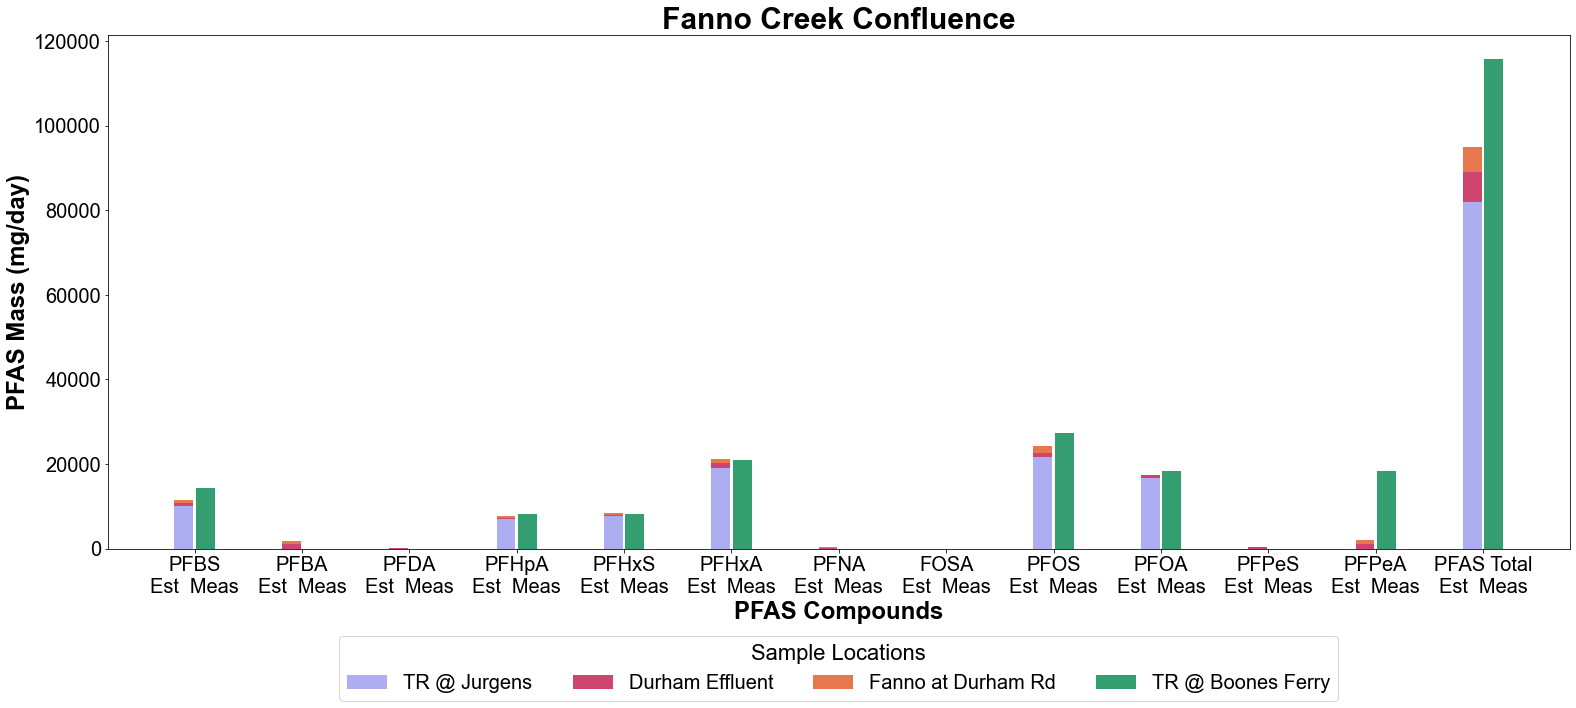

In [191]:
create_pfass_bar_chart(pfas_table=new_table,estimated_locations=estimated_locations,measured_location=measured_location , colors=colors,
                           figsize=(22, 10), title='Fanno Creek Confluence',
                            title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

In [192]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'MassBalanceFanno2024': new_table,
       'FilteredData': filtered_data}

#filename: The name of the Excel file to write to.
filename= 'MassBalanceFanno2024_Revised_QuantEst.xlsx'
dfs_to_excel(dfs, filename)

File 'MassBalanceFanno2024_Revised_QuantEst.xlsx' has been written with 2 tabs.


### Dry vs Wet Season

#### Prep Data

In [12]:
# Convert the 'Sampled Date' to datetime
data_df['Sampled Date'] = pd.to_datetime(data_df['Sampled Date'], errors='coerce')
filter_Sample_Locations = ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Ash Creek @ Greenburg','Fanno @ SW North Dakota St','Fanno @ SW Bonita Rd','Rock @ NW Old Cornelius Pass Rd',
                           'Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Dawson @ Brookwood','Rock @ River Rd','Fanno @ Durham Park',
                           'Fanno @ SW Grant Ave','Rock @ Brookwood','Beaverton @ Cornelius','Dairy @ Hwy 8','Chicken @ Sholls-Sherwood','Scoggins Below Hagg','Gales @ Stringtown',
                           'McKay @ Padgett','TR @ Cherry Grove','TR @ Golf Course','TR @ Farmington','Fanno at Durham Rd','TR @ Jurgens','TR @ Fernhill','TR @ Boones Ferry',
                           'TR @ Rood Br','Durham Effluent','Rock Creek Effluent']

In [29]:
data_RCEffluent_March2024 = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024') & (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
data_DurhamEffluent_March2024 = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024') & (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
data_ForestEffluent_March2024 = data_df[(data_df['Sample Location'] == 'Forest Grove Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024') & (data_df['Analysis Method'] == 1633) & (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]
data_HillsboroEffluent_March2024 = data_df[(data_df['Sample Location'] == 'Hillsboro Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024') & (data_df['Analysis Method'] == 1633) & (data_df['Qual Summary Grade Notes'] != 'Provisional because not fully authorized; in-lab comparison with Eurofins')]

data_RCEffluent_April2023 = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent')  & (data_df['Sample Date'] == '04/06/2023')]
data_DurhamEffluent_April2023 = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Sample Date'] == '04/06/2023')]
data_ForestEffluent_April2023 = data_df[(data_df['Sample Location'] == 'Forest Grove Effluent') & (data_df['Sample Date'] == '04/06/2023')]
data_HillsboroEffluent_April2023 = data_df[(data_df['Sample Location'] == 'Hillsboro Effluent') & (data_df['Sample Date'] == '04/06/2023')]

data_RCEffluent_Sep2023 = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent') & (data_df['Sample Date'] == '09/11/2023')]
data_DurhamEffluent_Sep2023 = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Sample Date'] == '09/11/2023')]
data_ForestEffluent_Sep2023 = data_df[(data_df['Sample Location'] == 'Forest Grove Effluent') & (data_df['Sample Date'] == '09/11/2023')]
data_HillsboroEffluent_Sep2023 = data_df[(data_df['Sample Location'] == 'Hillsboro Effluent') & (data_df['Sample Date'] == '09/11/2023')]

In [30]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-06-30'
data_df_June2023 = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date) 
                  & (data_df['Analysis'] == 'PFAS-CL')]

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-02-29'
data_df_Feb2024 = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date) 
                  & (data_df['Analysis'] == 'PFAS-CL')]

In [31]:
df_Wet_Dry=pd.concat([data_RCEffluent_March2024, data_DurhamEffluent_March2024,data_RCEffluent_April2023,data_DurhamEffluent_April2023,
                      data_RCEffluent_Sep2023,data_DurhamEffluent_Sep2023,data_df_June2023,data_df_Feb2024,data_ForestEffluent_March2024,
                      data_ForestEffluent_April2023,data_ForestEffluent_Sep2023,data_HillsboroEffluent_March2024,data_HillsboroEffluent_April2023,
                      data_HillsboroEffluent_Sep2023])

#### Functions

In [16]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [17]:
def split_label(label):
        if len(label) > 9:
            split_point = label.find(' ', 9)  # Find next space after 14th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label  # Return label unmodified if it's short enough or no space found

In [27]:
def create_seasonal_stacked_bar_chart(season_1_data, season_2_data, figsize=(12, 8), title='Seasonal PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, bar_width=0.35, rows_order=[]):
    try:
        font_bold = FontProperties(family='Arial', weight='bold')
        
        # Convert zeros to NaNs to avoid plotting zero-height bars
        season_1_data = season_1_data.replace(0, np.nan)
        season_2_data = season_2_data.replace(0, np.nan)
        
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize)
        locations = set(season_1_data.index).union(season_2_data.index)
        locations = sorted(locations, key=lambda x: rows_order.index(x) if x in rows_order else len(rows_order))
        
        # Position indices for the bars, adjusted to include gaps and three seasons
        x_indices = np.arange(len(locations))
        gap = 0.02  # This is the gap between bars
        adjusted_width = (bar_width - 2 * gap) / 3  # Adjust bar width to accommodate three bars
        
        season_bottoms = [{loc: 0 for loc in locations} for _ in range(3)]  # Tracking bottoms for each bar stack in three seasons
        legend_entries = {}  # Dictionary to manage legend entries

        # Iterate through each compound defined in the color dictionary
        for compound in compound_colors_dict:
            color = compound_colors_dict[compound]
            for i, season_data in enumerate([season_1_data, season_2_data]):
                heights = [season_data.at[loc, compound] if compound in season_data.columns and pd.notna(season_data.at[loc, compound]) else 0 for loc in locations]
                # Plot bars for each season with adjusted positions
                bars = ax.bar(x_indices + i * (adjusted_width + gap) - bar_width / 2, heights, width=adjusted_width,
                       bottom=[season_bottoms[i][loc] for loc in locations], color=color, align='edge')
                # Update bottom heights for stacking
                season_bottoms[i] = {loc: season_bottoms[i][loc] + height for loc, height in zip(locations, heights)}
                # Manage legend entries
                if compound not in legend_entries and any(heights):
                    legend_entries[compound] = bars[0]  # Use the first bar artist as the legend handle for this compound

        # Calculate the maximum stack height for setting y-axis limits
        max_stack_height = max(max(bottoms.values()) for bottoms in season_bottoms)
        ax.set_ylim(0, max_stack_height * 1.10 if max_stack_height > 0 else 1)  # Adjusting y-axis
        #ax.set_ylim(0, 180)  # Adjusting y-axis
        # Set y-axis ticks every 25 units
        #ax.set_yticks(np.arange(0, 181, 25))

        ax.set_xticks(x_indices)
        ax.set_xticklabels([split_label(label) for label in locations], rotation=45, ha='right', fontsize=tick_label_fontsize)
        ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title, fontsize=title_fontsize, fontproperties=font_bold)

        # Set the legend using the managed entries
        #ax.legend(legend_entries.values(), legend_entries.keys(), title='PFAS Compounds', loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=8, fontsize=legend_fontsize,title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

In [19]:
def align_dataframes(df_list):
    """ Ensure all dataframes in the list have the same columns by adding dummy columns with 0s where needed. """
    # Union all columns from all dataframes
    all_columns = sorted(set.union(*(set(df.columns) for df in df_list)))
    
    # Add missing columns with default values of 0
    for df in df_list:
        missing_cols = set(all_columns) - set(df.columns)
        for col in missing_cols:
            df[col] = 0  # Add missing columns with 0s
    
    # Reorder all columns to match the union of all columns
    for i in range(len(df_list)):
        df_list[i] = df_list[i][all_columns]
        
    return df_list

#### Define Seasons

In [32]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_wet='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_wet='2024-03-13'

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_dry='2023-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_dry='2023-09-13'

#### Ambient Locations in the Tualatin

In [256]:
# All Ambient Locations

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= df_Wet_Dry['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']

#For 2024 Data

rows_order= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']
rows_order_reverse=['TR @ Boones Ferry','TR @ Jurgens','TR @ Farmington',
                    'TR @ Rood Br','TR @ Golf Course','TR @ Fernhill',
                   'TR @ Cherry Grove' ]

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [257]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Wet_Dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
avg_pivot_table_dry

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0.0,0.00,0.25,0.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0.47,0,0,0,0
TR @ Fernhill,0.0,0.00,0.22,0.00,0.34,0.00,0.00,0,0,0,...,0,0,0,0,0,0.39,0,0,0,0
TR @ Golf Course,0.0,0.00,0.23,0.00,0.35,0.00,0.00,0,0,0,...,0,0,0,0,0,0.38,0,0,0,0
TR @ Rood Br,0.0,0.41,0.36,0.00,0.58,0.00,0.00,0,0,0,...,0,0,0,0,0,0.38,0,0,0,0
TR @ Farmington,4.5,2.60,2.80,1.10,1.70,0.26,0.34,0,0,0,...,0,0,0,0,0,0.51,0,0,0,0
TR @ Jurgens,4.9,3.30,3.00,0.98,2.00,0.35,0.37,0,0,0,...,0,0,0,0,0,0.49,0,0,0,0
TR @ Boones Ferry,4.7,3.40,3.50,1.20,2.40,0.30,0.37,0,0,0,...,0,0,0,0,0,0.32,0,0,0,0


In [258]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Wet_Dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
avg_pivot_table_wet

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Fernhill,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Golf Course,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Rood Br,0,0,0,0,0.0,0.0,0.00,0.98,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Farmington,0,0,0,0,0.0,1.1,0.50,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Jurgens,0,0,0,0,0.0,1.5,0.54,1.30,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Boones Ferry,0,0,0,0,1.4,1.6,0.63,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_dry,avg_pivot_table_wet]
aligned_dataframes = align_dataframes(dataframes)

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_dry, avg_pivot_table_wet = aligned_dataframes

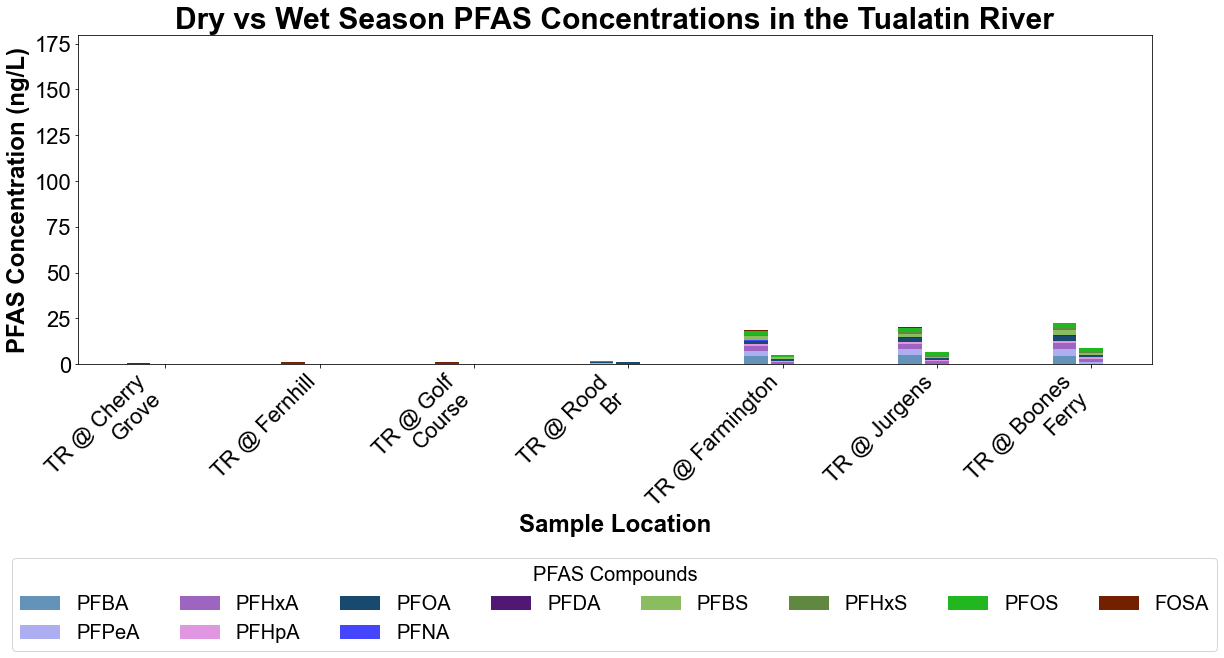

In [263]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_dry,season_2_data=avg_pivot_table_wet, figsize=(18,16), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20, bar_width=0.5,
                                   title='Dry vs Wet Season PFAS Concentrations in the Tualatin River',rows_order=rows_order)

In [261]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Dry Season': avg_pivot_table_dry,
       'Wet Season' :avg_pivot_table_wet
       }

#filename: The name of the Excel file to write to.PFAS concentration found at the WRRFs from Influent, Effluent, and Biosolids
filename= 'TualatinRiver.xlsx'
dfs_to_excel(dfs, filename)

File 'TualatinRiver.xlsx' has been written with 2 tabs.


#### Upper Tributaries

In [21]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= df_Wet_Dry['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Scoggins Below Hagg','Gales @ Stringtown','Forest Grove Effluent','Dairy @ Hwy 8','McKay @ Padgett','Hillsboro Effluent']

rows_order= ['Scoggins Below Hagg','Gales @ Stringtown','Forest Grove Effluent','Dairy @ Hwy 8','McKay @ Padgett','Hillsboro Effluent']
rows_order_reverse=['Hillsboro Effluent','McKay @ Padgett','Dairy @ Hwy 8','Forest Grove Effluent','Gales @ Stringtown','Scoggins Below Hagg']


col_name= 'Quant Incl Estimates Incl Qual Flags'

In [22]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Wet_Dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
avg_pivot_table_dry.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0,0,0,...,0,0,0,0,0,0.00,0,0,0,0
Gales @ Stringtown,0.00,0.00,0.00,0.00,0.34,0.000,0.00,0,0,0,...,0,0,0,0,0,0.36,0,0,0,0
Forest Grove Effluent,2.15,6.35,15.00,0.65,1.95,0.255,0.28,0,0,0,...,0,0,0,0,0,0.24,0,0,0,0
Dairy @ Hwy 8,0.00,0.68,0.59,0.29,0.88,0.000,0.00,0,0,0,...,0,0,0,0,0,0.31,0,0,0,0
McKay @ Padgett,2.10,2.00,1.80,1.00,2.10,0.380,0.39,0,0,0,...,0,0,0,0,0,0.35,0,0,0,0


In [23]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Wet_Dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
avg_pivot_table_wet.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
Gales @ Stringtown,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
Forest Grove Effluent,0,0,0,2.4,5.8,7.8,1.9,6.3,0.75,0,...,0,0,0,0,0,0,0,0,0,0
Dairy @ Hwy 8,0,0,0,0.0,0.0,0.0,0.0,1.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
McKay @ Padgett,0,0,0,2.1,1.3,1.8,1.1,2.8,0.00,0,...,0,0,0,0,0,0,0,0,0,0


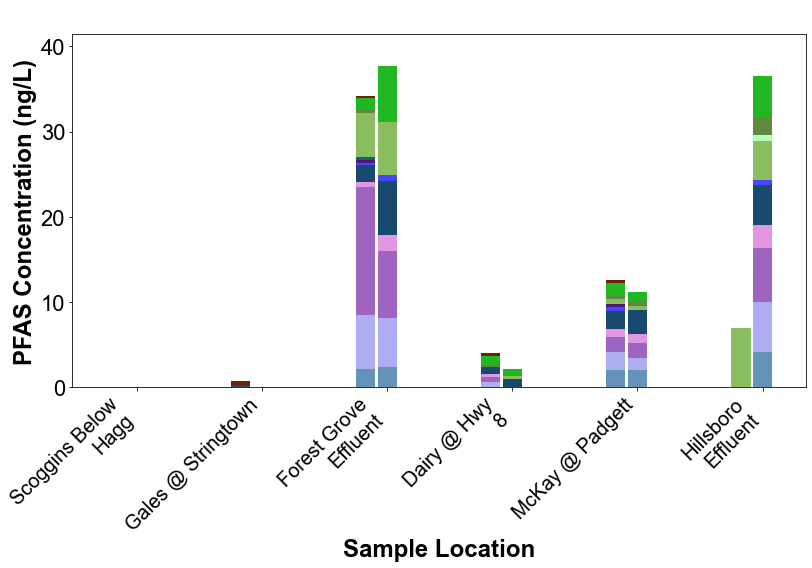

In [28]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_dry,season_2_data=avg_pivot_table_wet,figsize=(11.5,8), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title=' ',rows_order=rows_order)

In [242]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Dry Season': avg_pivot_table_dry,
       'Wet Season' :avg_pivot_table_wet
       }

#filename: The name of the Excel file to write to.PFAS concentration found at the WRRFs from Influent, Effluent, and Biosolids
filename= 'UpperTributaries.xlsx'
dfs_to_excel(dfs, filename)

File 'UpperTributaries.xlsx' has been written with 2 tabs.


#### Lower Tributaries

In [249]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= df_Wet_Dry['PFAS Compound'].unique()

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']

rows_order= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']
rows_order_reverse=['Fanno @ Durham Rd','Durham Effluent','Chicken @ Sholls-Sherwood','Rock @ Brookwood', 'Rock Creek Effluent']


col_name= 'Quant Incl Estimates Incl Qual Flags'

In [250]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Wet_Dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)

#avg_pivot_table_dry.index = avg_pivot_table_dry.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table_dry.index = avg_pivot_table_dry.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_dry

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,13.333333,10.533333,14.000000,2.400000,13.933333,11.333333,13.333333,1.2,0,0,...,0.83,0.626667,0,0,0,1.60,0,0.00,0,0
Rock @ Brookwood,4.400000,5.900000,5.000000,2.100000,5.000000,0.940000,0.960000,0.0,0,0,...,0.00,0.000000,0,0,0,0.37,0,0.00,0,0
Chicken @ Sholls- Sherwood,0.000000,1.500000,1.200000,0.470000,1.200000,0.000000,0.000000,0.0,0,0,...,0.00,0.000000,0,0,0,0.32,0,0.37,0,0
Durham Effluent,4.000000,9.566667,9.233333,1.333333,5.933333,0.600000,0.486667,0.0,0,0,...,0.00,0.000000,0,0,0,0.00,0,0.00,0,0
Fanno at Durham Rd,4.100000,6.200000,5.900000,2.900000,7.300000,1.100000,1.300000,0.0,0,0,...,0.00,0.000000,0,0,0,0.38,0,0.00,0,0


In [251]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=df_Wet_Dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)

#Reorder Compounds Based on PFAS Class and Chain Length
# Assuming df is your original DataFrame and df_PFAS_Attributes['Database'] contains the desired column order
desired_order = df['Database'].tolist()  # Convert to list if not already
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)

#avg_pivot_table_wet.index = avg_pivot_table_wet.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table_wet.index = avg_pivot_table_wet.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_wet

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,0,0,0,24.233333,19.3,22.0,6.176667,12.133333,1.38,0.667667,...,0.613333,0,0,0,0.021333,0,0,0,0,0
Rock @ Brookwood,0,0,0,3.600000,4.1,4.1,2.000000,4.900000,1.10,0.560000,...,0.000000,0,0,0,0.000000,0,0,0,0,0
Chicken @ Sholls- Sherwood,0,0,0,0.000000,1.4,1.3,0.760000,1.600000,1.10,0.000000,...,0.000000,0,0,0,0.000000,0,0,0,0,0
Durham Effluent,0,0,0,10.000000,8.8,9.4,2.800000,7.400000,1.00,0.590000,...,0.000000,0,0,0,0.000000,0,0,0,0,0
Fanno at Durham Rd,0,0,0,3.500000,5.8,5.3,2.600000,0.000000,1.00,0.760000,...,0.000000,0,0,0,0.000000,0,0,0,0,0


In [252]:
# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_dry, avg_pivot_table_wet]
aligned_dataframes = align_dataframes(dataframes)

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_dry, avg_pivot_table_wet = aligned_dataframes

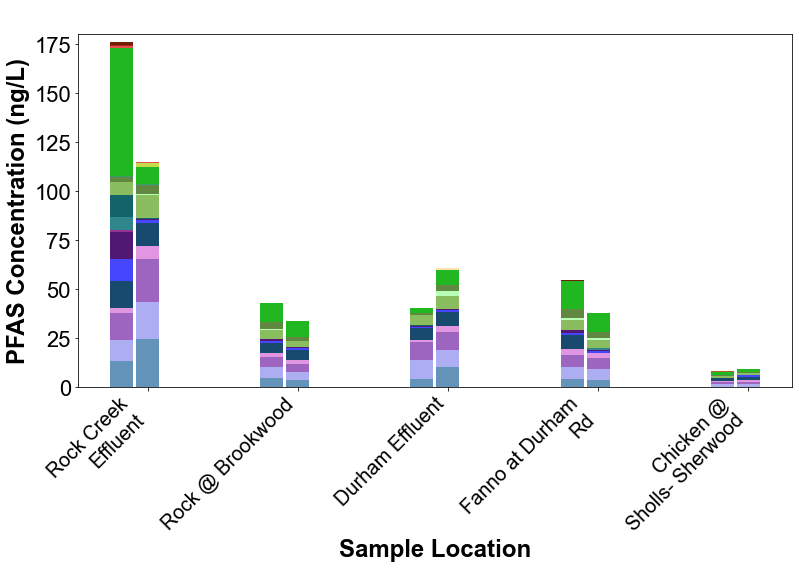

In [253]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_dry,season_2_data=avg_pivot_table_wet,figsize=(11.2,8), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title=' ',rows_order=rows_order)

In [254]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Dry Season': avg_pivot_table_dry,
       'Wet Season' :avg_pivot_table_wet
       }

#filename: The name of the Excel file to write to.PFAS concentration found at the WRRFs from Influent, Effluent, and Biosolids
filename= 'LowerTributaries.xlsx'
dfs_to_excel(dfs, filename)

File 'LowerTributaries.xlsx' has been written with 2 tabs.
